### Kaggle link: https://www.kaggle.com/datasets/mirichoi0218/insurance

# Medical Cost Personal Datasets

Content

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# Business Problem: 

How much will be the predicted individual medical cost?

https://datagy.io/python-sklearn-linear-regression/

## Download Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from matplotlib.ticker import ScalarFormatter



## Colour Theme

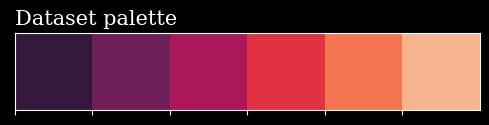

In [2]:
# black back ground for all visualizations
plt.style.use('dark_background')

# Get the 'rocket' color palette
rocket_palette = sns.color_palette('rocket')

# Display the 'rocket' color palette as a color palette plot
sns.palplot(rocket_palette)
plt.rcParams['font.size'] = 12
plt.rcParams['text.color'] = 'white'

# # Remove grid lines
plt.grid(False)
plt.title("Dataset palette ",loc='left',fontfamily='serif',fontsize=15)
plt.show()

## Load Data

In [3]:
%%time
# importing csv data
data = pd.read_csv(r"C:\Users\jolen\Practice Python\Linear Regression\Insurance\insurance.csv")

CPU times: total: 0 ns
Wall time: 7.04 ms


## Data

In [4]:
# Check data information
print('Dataset: %s [%d row(s) x %d col(s)]\n' % ('All', data.shape[0], data.shape[1]))
print('-' * 75)
print(data.info())
print('-' * 75)

Dataset: All [1338 row(s) x 7 col(s)]

---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
---------------------------------------------------------------------------


In [5]:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
print(data.tail())

      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [7]:
print(data.sample())

     age     sex    bmi  children smoker     region    charges
286   46  female  48.07         2     no  northeast  9432.9253


In [8]:
# Data describe
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1338.000000,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010


In [9]:
# unique values
print('Unique values')
print('-' * 75)
print(data.nunique())
print('-' * 75)

Unique values
---------------------------------------------------------------------------
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64
---------------------------------------------------------------------------


In [10]:
# check for data duplication
print('Sum of duplicate values is' ,data.duplicated().sum())

Sum of duplicate values is 1


In [11]:
print('Column Names')
print('-' * 75)
print(data.columns.values)
print('-' * 75)

Column Names
---------------------------------------------------------------------------
['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']
---------------------------------------------------------------------------


In [12]:
# check for null values
print('There are total null values of' ,data.isnull().sum().sum())
print('-' * 75)
print('List of number of null values in columns')
print(data.isnull().sum())
print('-' * 75)

There are total null values of 0
---------------------------------------------------------------------------
List of number of null values in columns
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
---------------------------------------------------------------------------


In [13]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['sex', 'smoker', 'region']


In [14]:
# view frequency of categorical variables

for var in categorical:    
    print(data[var].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [15]:
# check columns in categorical variables

for var in categorical:   
    print(var, ' contains ', len(data[var].unique()), ' labels')

sex  contains  2  labels
smoker  contains  2  labels
region  contains  4  labels


In [16]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['age', 'bmi', 'children', 'charges']


In [17]:
# view frequency of numerical variables
for var in numerical:     
    print(data[var].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


In [18]:
# check columns in numerical variables

for var in numerical:    
    print(var, ' contains ', len(data[var].unique()), ' labels')

age  contains  47  labels
bmi  contains  548  labels
children  contains  6  labels
charges  contains  1337  labels


### Demographics of categorical variables

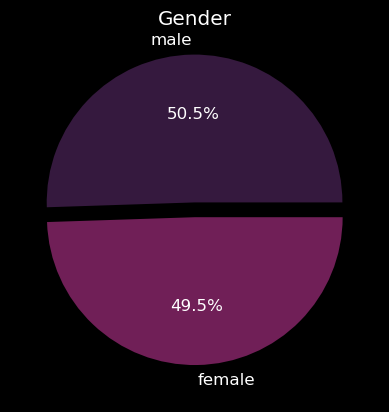

In [19]:
# Get the frequency of each unique value in the 'region' variable
region_counts = data['sex'].value_counts()

# Set the color palette
colors = sns.color_palette('rocket')

#Explode
explode = [0.1,0]

# Create a pie chart with the frequency values and labels from 'region_counts'
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)

# Add a title to the plot
plt.title('Gender')

# Show the plot
plt.show()

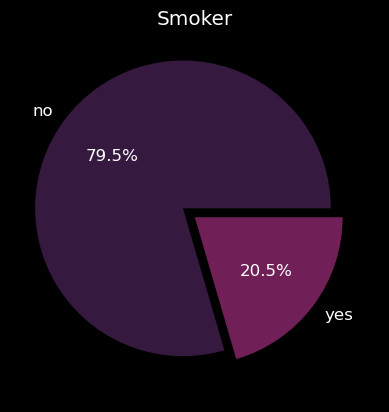

In [20]:
# Get the frequency of each unique value in the 'region' variable
region_counts = data['smoker'].value_counts()

# Set the color palette
colors = sns.color_palette('rocket')

#Explode
explode = [0.1,0]

# Create a pie chart with the frequency values and labels from 'region_counts'
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)

# Add a title to the plot
plt.title('Smoker')

# Show the plot
plt.show()

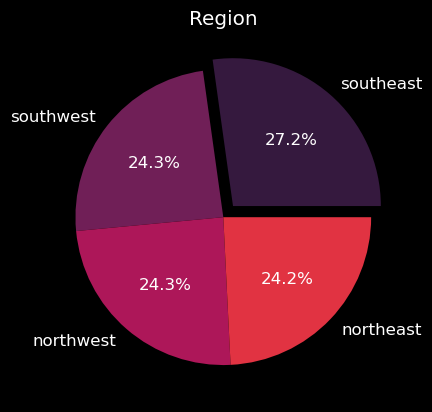

In [21]:
# Get the frequency of each unique value in the 'region' variable
region_counts = data['region'].value_counts()

# Set the color palette
colors = sns.color_palette('rocket')

#Explode
explode = [0.1,0,0,0]

# Create a pie chart with the frequency values and labels from 'region_counts'
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)

# Add a title to the plot
plt.title('Region')

# Show the plot
plt.show()

### Demographics of numericals variables

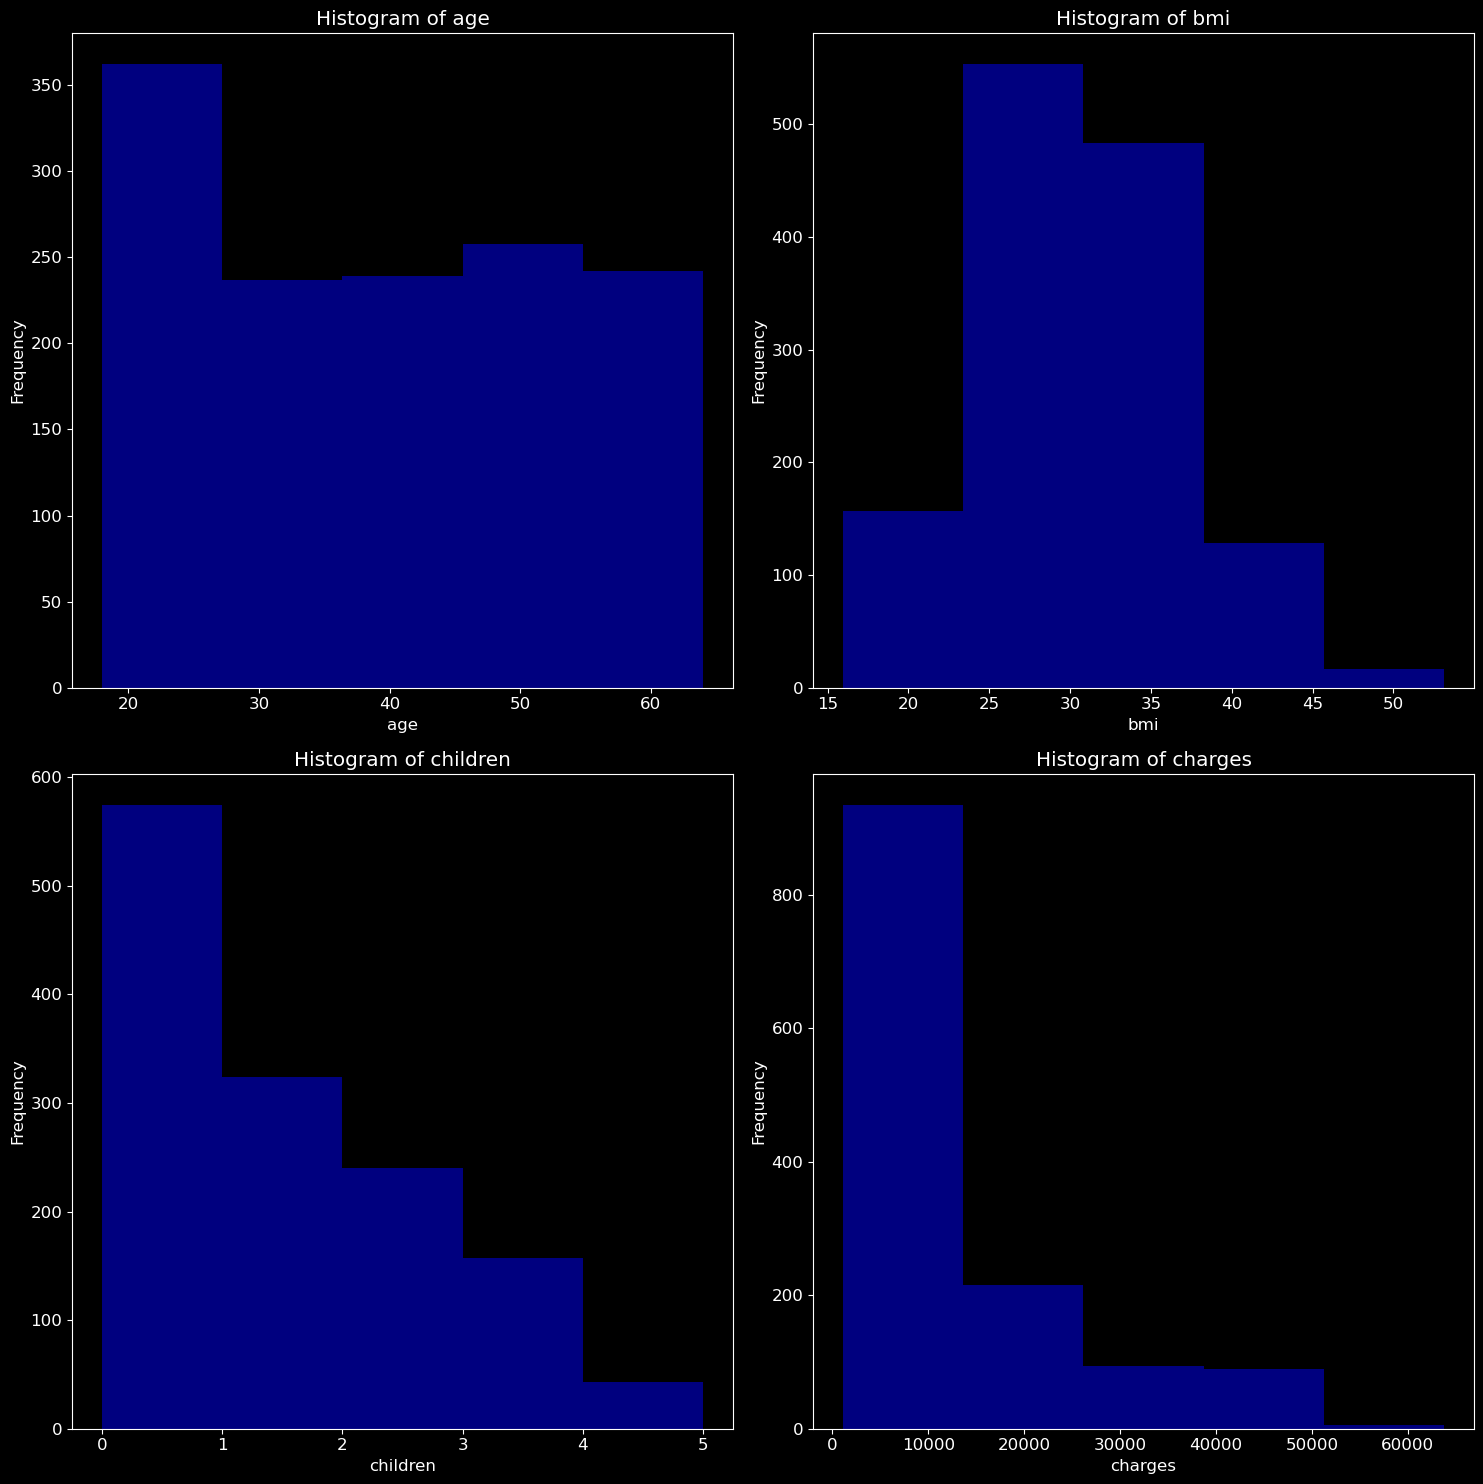

In [22]:
# Histogram for numerical features
num_cols = data.select_dtypes(include=['float', 'int']).columns
ncols = 2
nrows = 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
ax = ax.ravel()

for i, col in enumerate(num_cols):
    ax[i].hist(data[col], bins=5, color='blue', alpha=0.5)
    ax[i].set_title(f'Histogram of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()

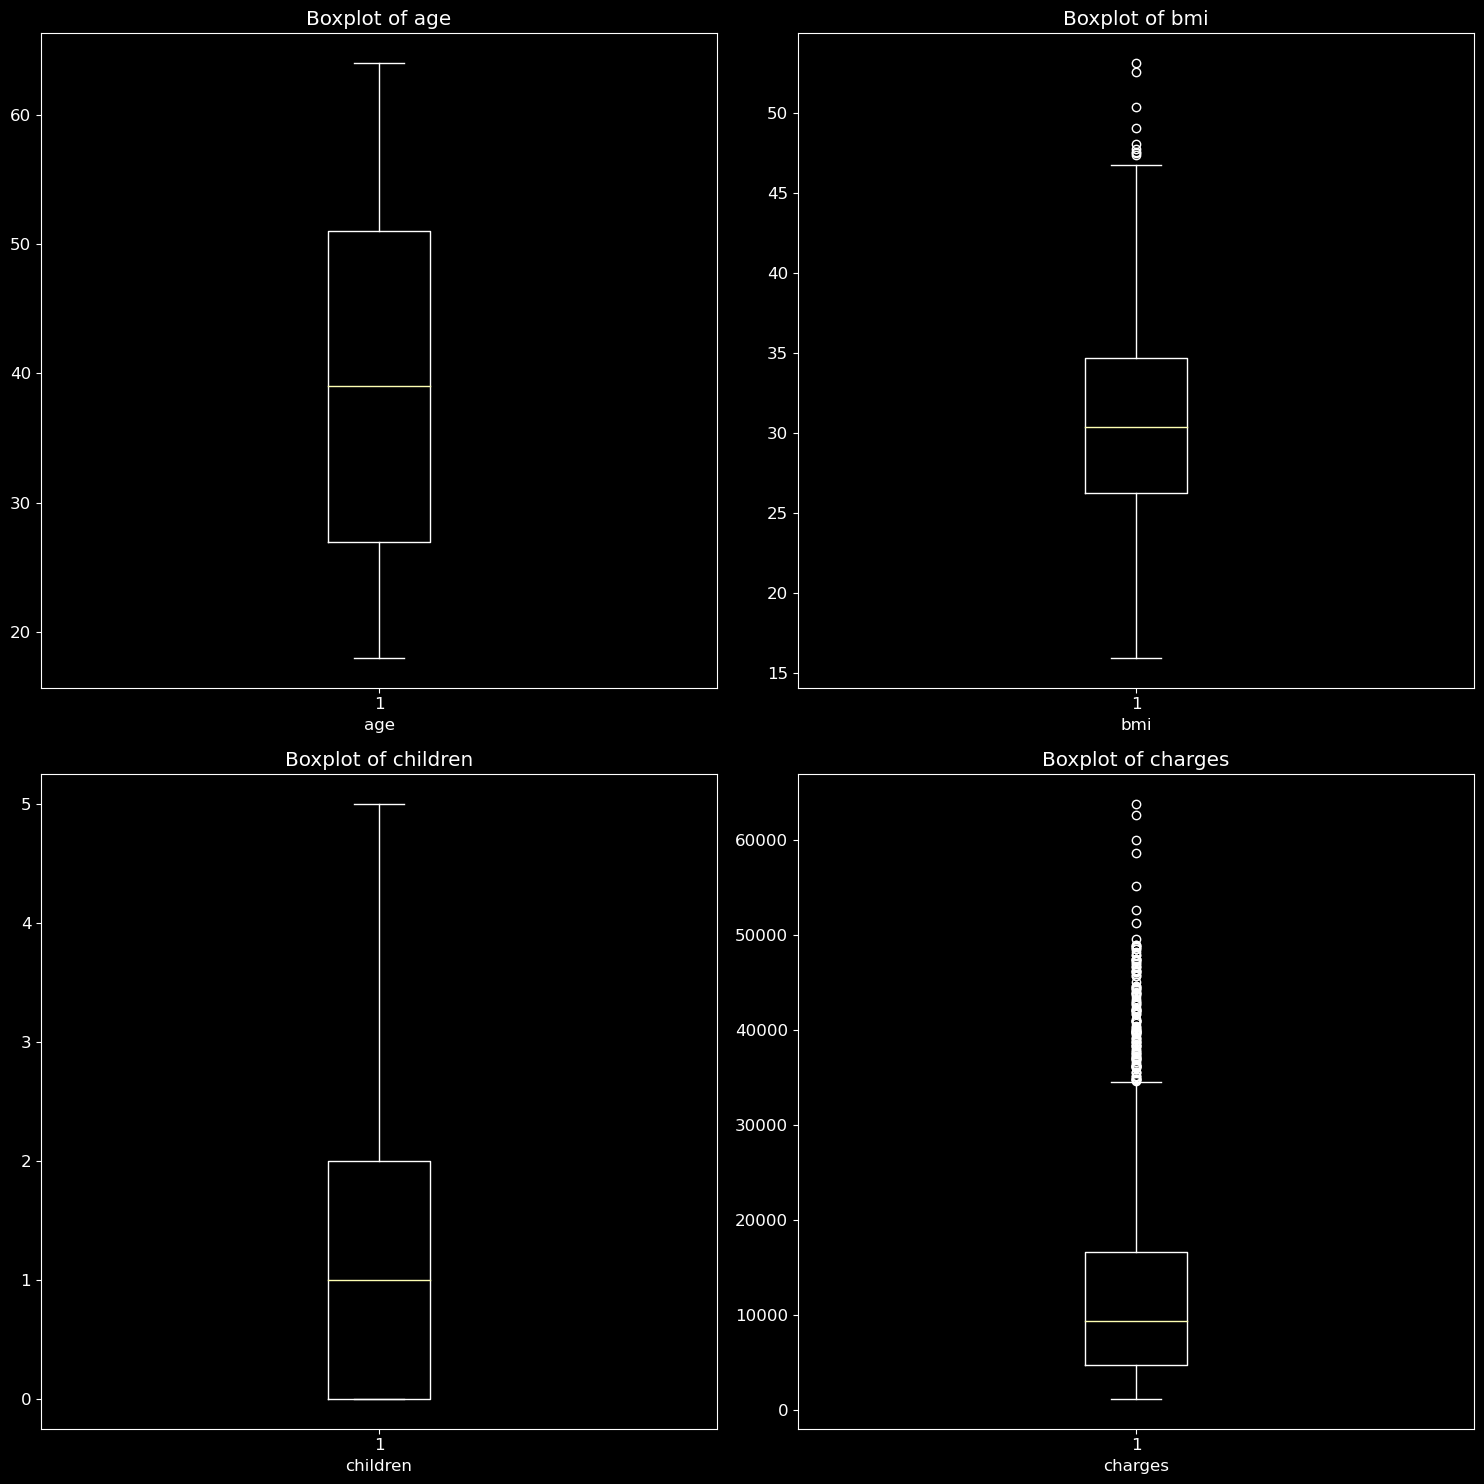

In [23]:
# boxplot for numerical columns
num_cols = data.select_dtypes(include=['float', 'int64']).columns
ncols = 2
nrows = 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
ax = ax.ravel()

for i, col in enumerate(num_cols):
    ax[i].boxplot(data[col], vert=True)
    ax[i].set_title(f'Boxplot of {col}')
    ax[i].set_xlabel(col)

plt.tight_layout()

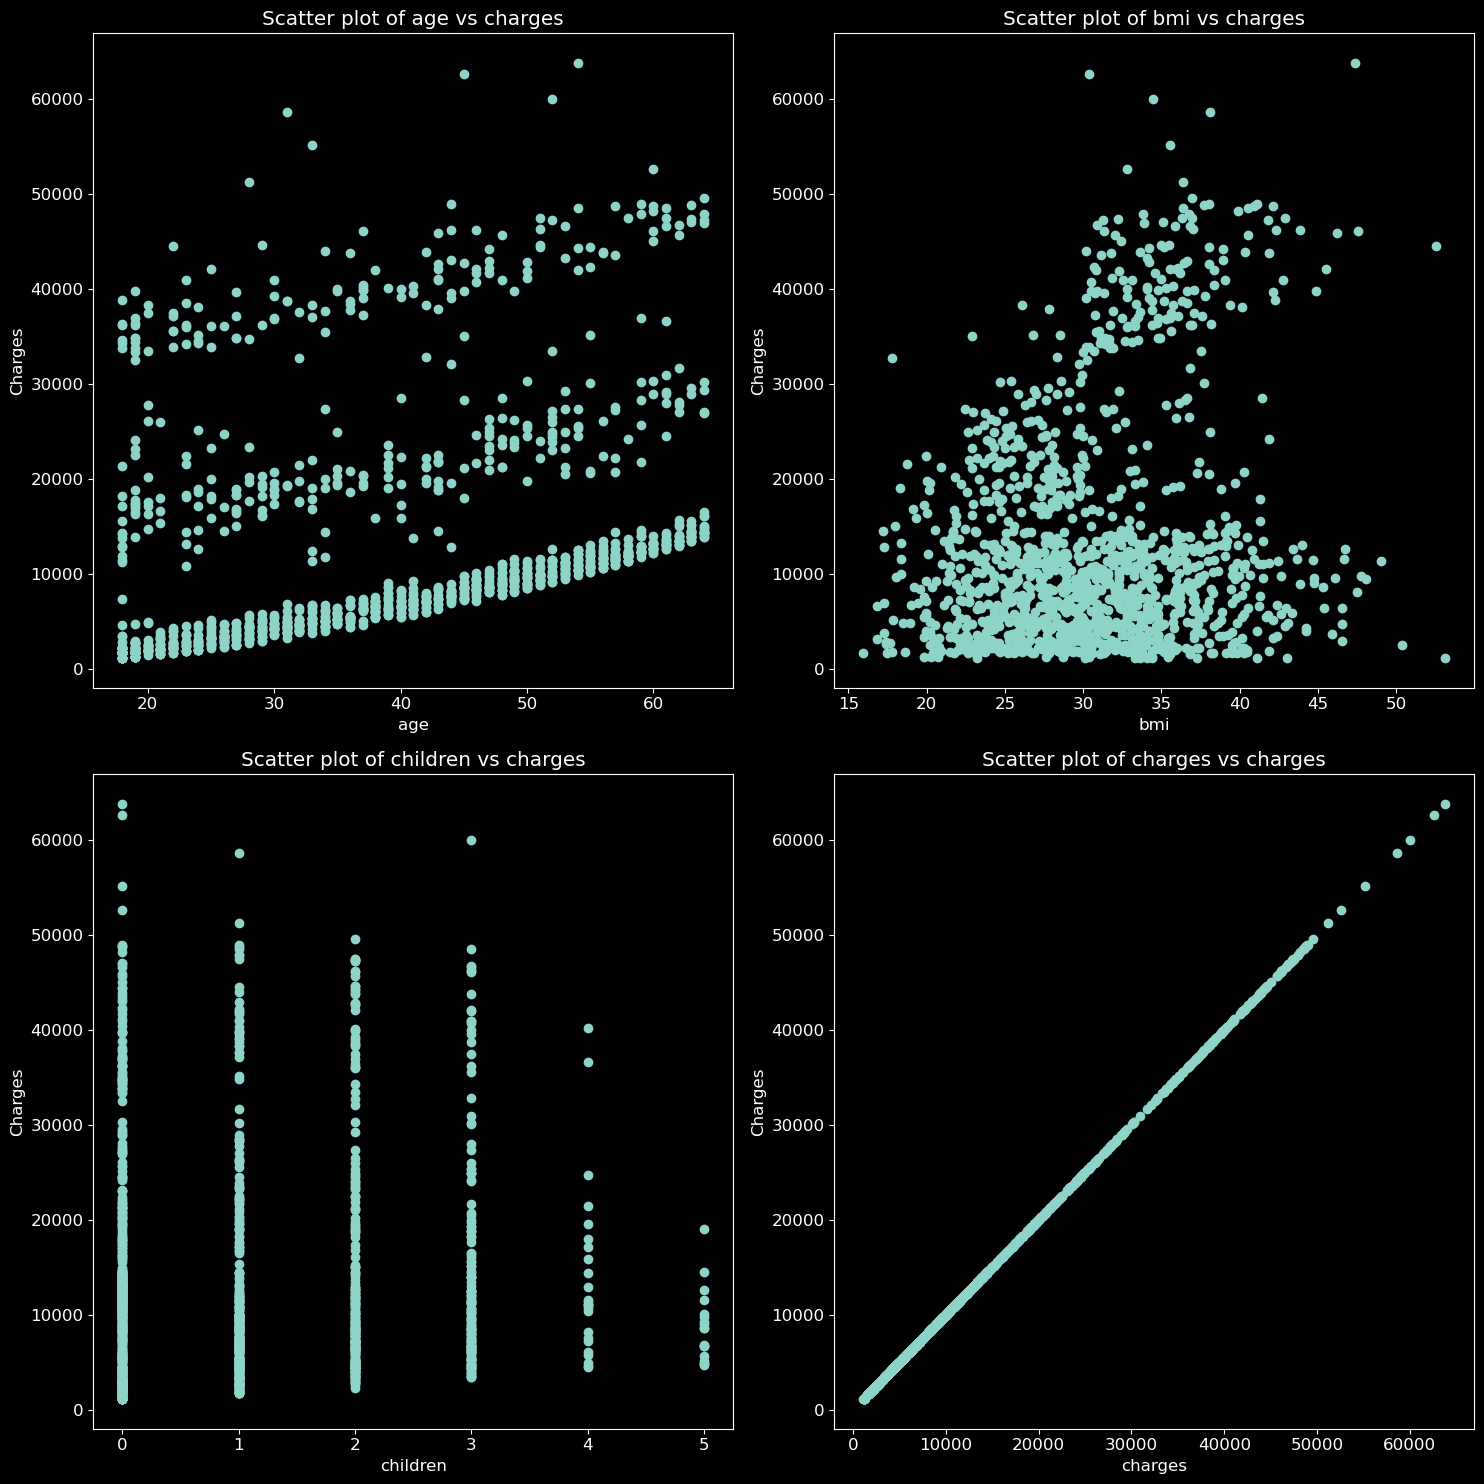

In [24]:
num_cols = data.select_dtypes(include=['float', 'int64']).columns
ncols = 2
nrows = 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
ax = ax.ravel()

for i, col in enumerate(num_cols):
    ax[i].scatter(data[col], data['charges'])
    ax[i].set_title(f'Scatter plot of {col} vs charges')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Charges')

plt.tight_layout()

## EDA

### Duplications

In [25]:
# check for data duplication
print('Sum of duplicate values is' ,data.duplicated().sum())

Sum of duplicate values is 1


In [26]:
# Find the duplicate rows
# No actions are taken as there might be same but not duplicated.

duplicate_mask = data.duplicated(keep=False)
duplicates = data[duplicate_mask]
print('Duplicated rows:')
print('-' * 75)
print(duplicates)
print('-' * 75)

Duplicated rows:
---------------------------------------------------------------------------
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631
---------------------------------------------------------------------------


### Outliers

In [27]:
# Outliers in numerical features- age
column = 'age' # specify the column of interest
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the rows where the value in the column is less than the lower bound or greater than the upper bound
age_outlier_rows = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index

print(data.loc[age_outlier_rows])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [28]:
# Outliers in numerical features- bmi
# No actions taken to bmi outlier
column = 'bmi' # specify the column of interest
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the rows where the value in the column is less than the lower bound or greater than the upper bound
bmi_outlier_rows = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index

print(data.loc[bmi_outlier_rows])

      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


In [29]:
# Outliers in numerical features- children
column = 'children' # specify the column of interest
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the rows where the value in the column is less than the lower bound or greater than the upper bound
children_outlier_rows = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index

print(data.loc[children_outlier_rows])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


<AxesSubplot: >

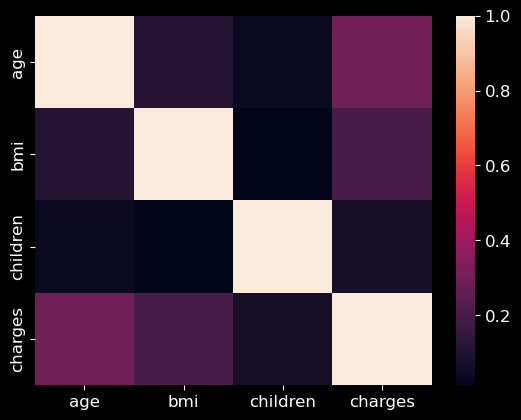

In [30]:
# Heatmap
sns.heatmap(data.corr(numeric_only=True))

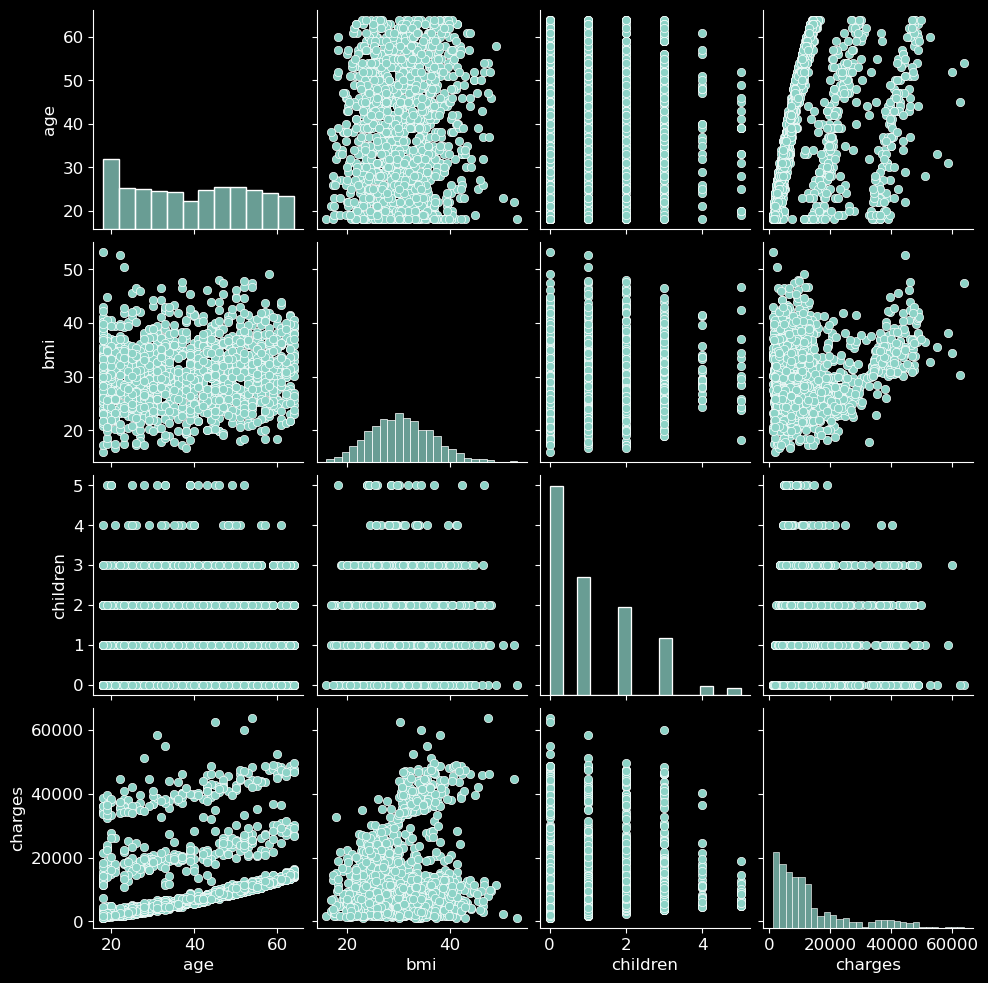

In [31]:
sns.pairplot(data)

## Modelling

In [32]:
#Target variable

target_col = 'charges'

y = data[target_col]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [33]:
# Feature columns

feature_cols = [c for c in data.columns if c != target_col]

X = pd.DataFrame(data[feature_cols])
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


### Train test split

In [34]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

In [35]:
len(X_train)/len(data)

0.7997010463378177

### Normalize the data

In [38]:
# Separate the numerical and categorical features
num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

# Fit the numerical transformers on the training data
scaler_minmax = MinMaxScaler().fit(X_train[['age','children']])
scaler_standard = StandardScaler().fit(X_train[['bmi']])
# Note: the double square brackets are used to maintain a 2D array for the StandardScaler

# Fit the categorical transformer on the training data
encoder = LabelEncoder()
for col in cat_cols:
    encoder.fit(X_train[col])
    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Transform the training data using the transformers
X_train_num_scaled = scaler_minmax.transform(X_train[['age','children']])
X_train_bmi_scaled = scaler_standard.transform(X_train[['bmi']])

# Transform the test data using the transformers fit on the training data
X_test_num_scaled = scaler_minmax.transform(X_test[['age','children']])
X_test_bmi_scaled = scaler_standard.transform(X_test[['bmi']])

# Combine the transformed features back into a single array
X_train_transformed = np.concatenate((X_train_num_scaled, X_train_bmi_scaled, X_train[cat_cols]), axis=1)

# Combine the transformed features back into a single array
X_test_transformed = np.concatenate((X_test_num_scaled, X_test_bmi_scaled, X_test[cat_cols]), axis=1)

In [44]:
print(X_train_transformed[0])

[ 0.60869565  0.4        -1.75652513  0.          0.          1.        ]


### Linear Regression

### GridsearchCV- Hyperparameter tuning

In [48]:
# Define the model
lr = LinearRegression()

# Define the hyperparameters and their possible values
params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1,2,3,4,5],
    'positive': [True,False]}

# Perform grid search cross validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lr, param_grid=params, cv=5)
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}
Best score:  0.7345240790812604


In [49]:
# build the final model using the best hyperparameters
lr = LinearRegression(**grid_search.best_params_)

In [50]:
lr.fit(X_train_transformed, y_train)

LinearRegression(positive=True)

lr.coef_ is an attribute of the LinearRegression object that returns an array of coefficients for each independent variable. The coefficient represents the change in the dependent variable for a unit change in the corresponding independent variable while holding all other variables constant.

In [51]:
print(lr.coef_)

[11825.27326582  2135.99985473  1978.4204322      0.
 23653.21164629     0.        ]


lr.intercept_ is an attribute of the LinearRegression object that returns the intercept value of the linear regression line. It represents the predicted value of the dependent variable when all independent variables are equal to zero. It is the point where the regression line crosses the y-axis.

In [52]:
print(lr.intercept_)

2519.4274660030096


### Predicted training

In [53]:
y_pred_train = lr.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [ 7096.6746239   7930.61973784  9392.83774839 ... 11038.4343249
 37492.24659835 11814.76528296]


### Train scores

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is calculated as the average of the absolute differences between the predicted and actual values. The lower the MAE, the better the model's performance.

MSE, on the other hand, measures the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily than smaller errors. Like MAE, the lower the MSE, the better the model's performance.

For both the Mean Absolute Error (MAE) and Mean Squared Error (MSE), the lower the value, the better the performance of the model. This is because they measure the distance between the predicted values and the actual values, and lower values indicate that the model's predictions are closer to the actual values.

For R-squared (R2), the higher the value, the better the performance of the model. This is because R2 measures the proportion of variance in the target variable that is explained by the independent variables in the model. An R2 value of 1 indicates that all the variance in the target variable is explained by the independent variables, while an R2 value of 0 indicates that the independent variables have no explanatory power.

In [54]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.7410887501824264
MAE: 4210.664111721675
MSE: 37369598.44540845
Adjusted R-squared: 0.7403601068902568


The training set performance of the linear regression model can be summarized as follows:

R-squared (R2) = 0.7417, which indicates that 74.17% of the variance in the target variable (charges) can be explained by the selected features in the model.

Mean Absolute Error (MAE) = 4208.23, which represents the average absolute difference between the predicted and actual charges in the training set.

Mean Squared Error (MSE) = 37277681.70, which represents the average squared difference between the predicted and actual charges in the training set.

Adjusted R-squared = 0.7410, which adjusts R-squared for the number of features used in the model. It is slightly lower than R-squared due to the inclusion of additional features in the model.

### Learning Curve

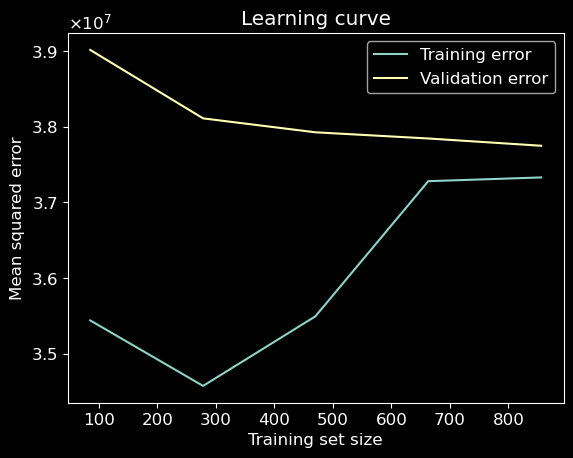

In [55]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted test

In [56]:
y_pred_test= lr.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [ 8550.90921341  6969.71599759 36794.13661808  9421.86824203
 26875.01095777 11101.26514111   141.44896605 16750.22436643
   743.78364016 11157.63586446 28521.42342227  9296.15962897
  5456.5831315  38513.59317763 40362.63211366 37226.61219261
 15312.47750251 36042.83494384  9322.40796481 31395.64230108
  4273.49461256 10468.62243337  2723.96491222  6575.5287315
 11228.01912269 12468.20703945 14803.23875441  6062.13408867
  9531.77127863  2381.73787018  9470.9842188  12959.38866372
  4702.13338911  3410.73606761  4819.65393639 12488.16536441
  2355.2166747   9157.11135848 33234.15784494 32746.6948439
  4270.42403098  4233.52485656 14431.41993531 11388.84943272
  8929.60714179 12484.19557109  5150.40526844  3550.1037231
 35652.7853174   9280.12457197 15967.47938558  2556.74541518
 12158.95859481  1066.73450634 13555.51395976 12107.63444981
  3933.78585209 32050.44566484 13634.05117632 12397.82378122
 14493.62754566 10572.23545909 16669.43245629  7717.46643965
 11362.8863744

### Test Scores

These are different evaluation metrics for a linear regression model:

R2: also known as the coefficient of determination, measures the proportion of variance in the target variable that can be explained by the independent variables. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

MAE: Mean Absolute Error measures the average absolute difference between the predicted and actual values of the target variable. It is less sensitive to outliers than MSE.

MSE: Mean Squared Error measures the average squared difference between the predicted and actual values of the target variable. It is more sensitive to outliers than MAE.

Adjusted R-squared: is a modified version of R-squared that adjusts for the number of independent variables in the model. It penalizes the inclusion of irrelevant variables in the model.

In the given example, the R2 score is 0.784, indicating that the model explains 78.4% of the variance in the target variable. The MAE is 4181.19, which means that on average, the predicted value differs from the actual value by $4,181.19. The MSE is 33,596,915.85, which means that on average, the predicted value differs from the actual value squared by 33,596,915.85. The Adjusted R-squared is 0.781, indicating that the model is a good fit, and the inclusion of independent variables has been appropriate.

In [57]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)


R2: 0.7811147722517889
MAE: 4213.798594527234
MSE: 33981653.95019771
Adjusted R-squared: 0.7786274401182866


### Residual plot

A residual plot is a graphical representation of the difference between the actual values and the predicted values in a regression analysis. In a residual plot, the x-axis represents the predicted values, while the y-axis represents the residuals, which are the differences between the actual and predicted values.

The residual plot can be used to check whether the assumptions of a linear regression model are met. The following are some of the things to look for in a residual plot:

Randomness: The residuals should be randomly distributed around the horizontal line at zero. If there is a pattern to the residuals, such as a U-shape or a curve, it suggests that the model is not capturing all the information in the data.

Homoscedasticity: The spread of the residuals should be constant across the range of predicted values. If the spread of the residuals varies across the range of predicted values, it suggests that the model is not capturing all the information in the data.

Outliers: Outliers in the data can be identified as points that are far away from the horizontal line at zero in the residual plot.

Overall, the residual plot is a useful tool for checking the assumptions of a linear regression model and ensuring that the model is accurately capturing the information in the data.

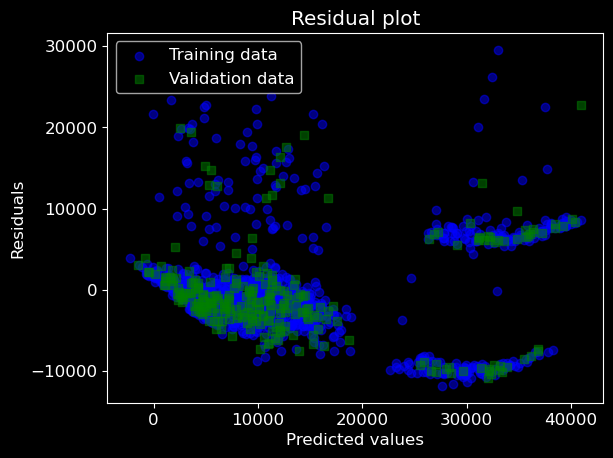

In [58]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

## Lasso

#### GridsearchCV 

In [74]:
# Define the range of alpha values to test
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Create a Lasso regression model
lasso = Lasso(max_iter=20000)

# Define the parameter grid to search over
param_grid = {'alpha': alphas}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters and corresponding RMSE score
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best RMSE score:", np.sqrt(-grid_search.best_score_))

Best alpha: 10
Best RMSE score: 6149.303328853653


In [75]:
# build the final model using the best hyperparameters
lasso = Lasso(**grid_search.best_params_)

In [76]:
lasso.fit(X_train_transformed, y_train)

Lasso(alpha=10)

In [77]:
print(lasso.coef_)

[11723.86033397  1965.06325784  2019.80131947    -0.
 23582.51705002  -261.90832222]


In [78]:
print(lasso.intercept_)

3013.9741926810875


### Predicted training

In [79]:
y_pred_train = lasso.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [ 7126.52221052  8318.48235895  9249.55985245 ... 11407.90320844
 37136.84104033 11437.49171808]


### Train Scores

In [80]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.741680630398952
MAE: 4211.075871318633
MSE: 37284170.23000674
Adjusted R-squared: 0.7409536528109566


### Learning Curve

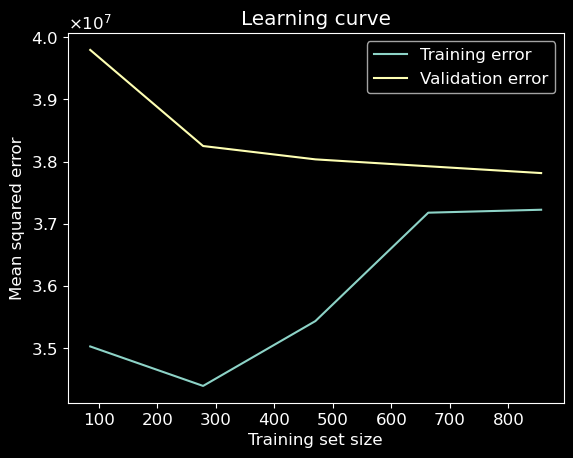

In [81]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(lasso, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted Test

In [82]:
y_pred_test= lr.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [ 8550.90921341  6969.71599759 36794.13661808  9421.86824203
 26875.01095777 11101.26514111   141.44896605 16750.22436643
   743.78364016 11157.63586446 28521.42342227  9296.15962897
  5456.5831315  38513.59317763 40362.63211366 37226.61219261
 15312.47750251 36042.83494384  9322.40796481 31395.64230108
  4273.49461256 10468.62243337  2723.96491222  6575.5287315
 11228.01912269 12468.20703945 14803.23875441  6062.13408867
  9531.77127863  2381.73787018  9470.9842188  12959.38866372
  4702.13338911  3410.73606761  4819.65393639 12488.16536441
  2355.2166747   9157.11135848 33234.15784494 32746.6948439
  4270.42403098  4233.52485656 14431.41993531 11388.84943272
  8929.60714179 12484.19557109  5150.40526844  3550.1037231
 35652.7853174   9280.12457197 15967.47938558  2556.74541518
 12158.95859481  1066.73450634 13555.51395976 12107.63444981
  3933.78585209 32050.44566484 13634.05117632 12397.82378122
 14493.62754566 10572.23545909 16669.43245629  7717.46643965
 11362.8863744

### Test Scores

In [83]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.7811147722517889
MAE: 4213.798594527234
MSE: 33981653.95019771
Adjusted R-squared: 0.7786274401182866


### Residual plot

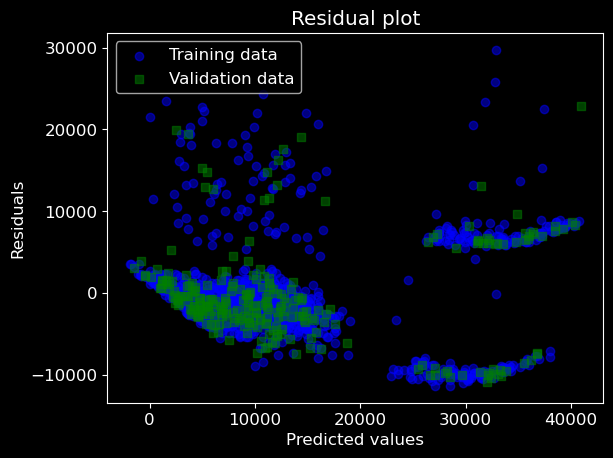

In [84]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

### Ridge

### GridsearchCV

In [86]:
# define the parameter grid
param_grid = {
'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# create a Ridge regression object
ridge = Ridge()

# create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the GridSearchCV object to the data
grid_search.fit(X_train_transformed, y_train)

# print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

# calculate mean squared error on the test set using the best estimator
ridge_best = grid_search.best_estimator_
y_pred = ridge_best.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", mse)

Best Hyperparameters: {'alpha': 1}
Best Mean Squared Error: 37829684.21763275
Test Mean Squared Error: 33684712.57460095


In [87]:
# build the final model using the best hyperparameters
ridge = Ridge(**grid_search.best_params_)

In [88]:
ridge.fit(X_train_transformed, y_train)

Ridge(alpha=1)

In [89]:
print(ridge.coef_)

[ 1.16982355e+04  2.10490393e+03  2.03070194e+03 -1.12818597e+01
  2.35078678e+04 -2.71277873e+02]


In [90]:
print(ridge.intercept_)

3030.156899871243


### Predicted training

In [91]:
y_pred_train = lasso.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [ 7126.52221052  8318.48235895  9249.55985245 ... 11407.90320844
 37136.84104033 11437.49171808]


### Train Scores

In [92]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.741680630398952
MAE: 4211.075871318633
MSE: 37284170.23000674
Adjusted R-squared: 0.7409536528109566


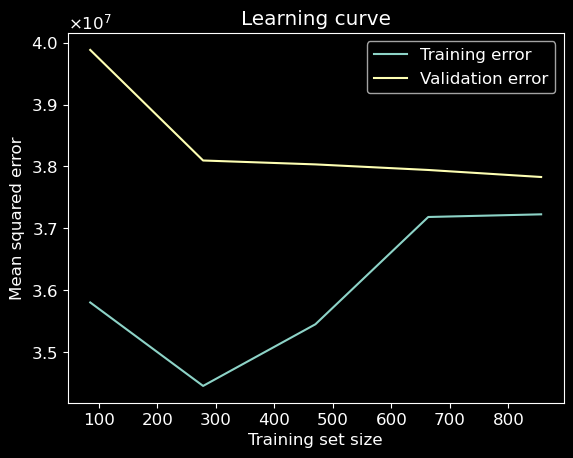

In [93]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(ridge, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted test

In [94]:
y_pred_test= lr.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [ 8550.90921341  6969.71599759 36794.13661808  9421.86824203
 26875.01095777 11101.26514111   141.44896605 16750.22436643
   743.78364016 11157.63586446 28521.42342227  9296.15962897
  5456.5831315  38513.59317763 40362.63211366 37226.61219261
 15312.47750251 36042.83494384  9322.40796481 31395.64230108
  4273.49461256 10468.62243337  2723.96491222  6575.5287315
 11228.01912269 12468.20703945 14803.23875441  6062.13408867
  9531.77127863  2381.73787018  9470.9842188  12959.38866372
  4702.13338911  3410.73606761  4819.65393639 12488.16536441
  2355.2166747   9157.11135848 33234.15784494 32746.6948439
  4270.42403098  4233.52485656 14431.41993531 11388.84943272
  8929.60714179 12484.19557109  5150.40526844  3550.1037231
 35652.7853174   9280.12457197 15967.47938558  2556.74541518
 12158.95859481  1066.73450634 13555.51395976 12107.63444981
  3933.78585209 32050.44566484 13634.05117632 12397.82378122
 14493.62754566 10572.23545909 16669.43245629  7717.46643965
 11362.8863744

### Test Scores

In [95]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.7811147722517889
MAE: 4213.798594527234
MSE: 33981653.95019771
Adjusted R-squared: 0.7786274401182866


### Residual Plot

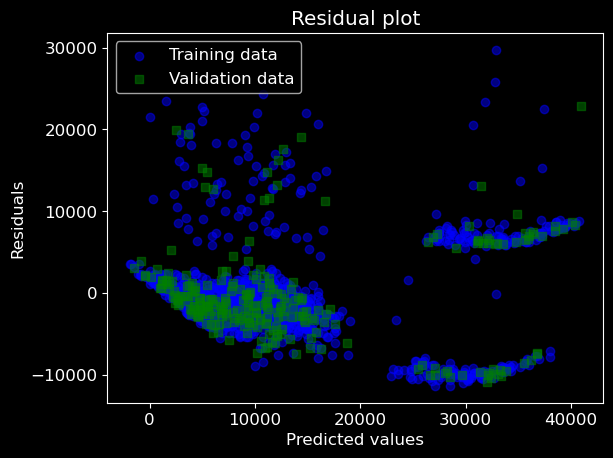

In [96]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

### GradientBoostingRegressor

### GridsearchCV

In [98]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}

# Create the GradientBoostingRegressor model
gbm = GradientBoostingRegressor(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


In [99]:
# build the final model using the best hyperparameters
gbm = GradientBoostingRegressor(**grid_search.best_params_)

In [100]:
gbm.fit(X_train_transformed, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_features='sqrt',
                          min_samples_split=10, n_estimators=1000)

### Predicted Training

In [101]:
y_pred_train = gbm.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [ 8911.56958369 11518.19268285 12786.25645674 ... 12192.27153447
 42495.35585115 11688.83518602]


### Training Scores

In [102]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.887523061244766
MAE: 2217.1575254358663
MSE: 16234203.95449577
Adjusted R-squared: 0.8872065220174998


### Learning Curve

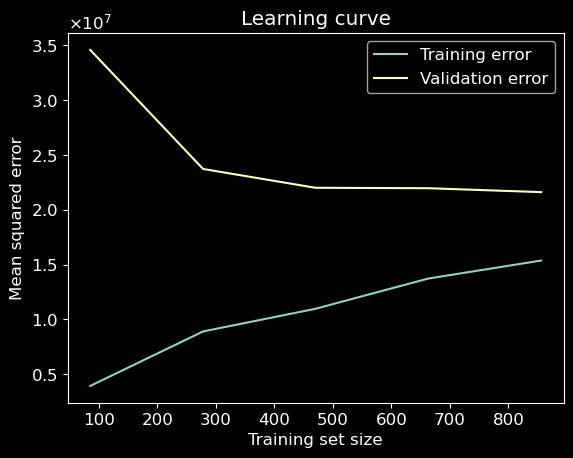

In [103]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(gbm, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted Test

In [104]:
y_pred_test= gbm.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [11367.92131842  6006.90271835 28435.72256312  9960.01665663
 33159.4794855   6227.47866836  2759.92815933 15073.10379625
  4288.36499768 10466.66741859 18901.18162053  8118.17440906
  5092.29502755 44361.49821458 47554.52301687 44620.98619415
 10385.53312108 43507.30212093  9782.66081582 24391.32091556
  5526.10404896  9036.09979362  2288.98595124  4558.6801746
 11810.69654123 12871.83591864 14628.06495135  6707.9607552
 12043.37982386  2624.84127065  7591.58611552 12371.53571209
  3086.22116331  5918.48224745  4777.43142461 10647.09884352
  3877.11432836  8428.77717486 26116.1677829  39366.84495749
  5451.50661642  4936.3999933  12914.4005809  13569.61217924
  8120.496059   14036.11272316  7176.56219557  5987.38271773
 42817.64206016  6932.96841445 15138.40514597  3114.70079207
  7446.60347408  2344.11210033 12481.14899815 12079.87120581
  4508.21848129 39071.80974447 11990.47179454 12860.27329935
 14357.35800187  5991.45337104 16226.93549248  8656.52118266
 12158.952101

### Test Scores

In [105]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8796759202233444
MAE: 2429.6171414807445
MSE: 18680160.753240738
Adjusted R-squared: 0.8783086011349733


### Residual Plot

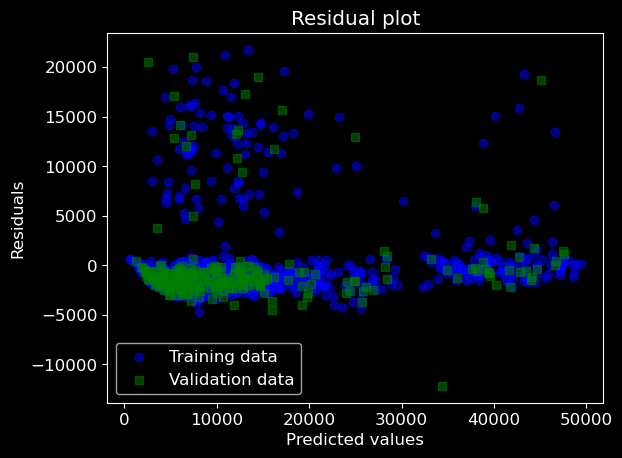

In [106]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

### ElasticNet

### GridsearchCV

In [107]:
# Define ElasticNet regressor model
elasticnet = ElasticNet()

# Set up hyperparameter grid for tuning
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter' : [10000,20000,30000]
}

# Use GridSearchCV for hyperparameter tuning
elasticnet_cv = GridSearchCV(
    estimator=elasticnet,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
)

# Fit the model on the training data
elasticnet_cv.fit(X_train_transformed, y_train)

# Print the best hyperparameters and corresponding RMSE
print("Best hyperparameters: ", elasticnet_cv.best_params_)
print("Best RMSE: ", np.sqrt(-elasticnet_cv.best_score_))


Best hyperparameters:  {'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter': 10000}
Best RMSE:  6150.505545510945


In [108]:
# build the final model using the best hyperparameters
enet = ElasticNet(**elasticnet_cv.best_params_)

In [109]:
enet.fit(X_train_transformed, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.25, max_iter=10000)

### Predicted Training

In [110]:
y_pred_train = enet.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [ 7154.73453492  8306.05053893  9219.22290792 ... 11383.98489302
 37147.10452067 11393.68025504]


### Training Scores

In [111]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.7416848252063378
MAE: 4216.703695778073
MSE: 37283564.77826343
Adjusted R-squared: 0.7409578594236165


### Learning Curve

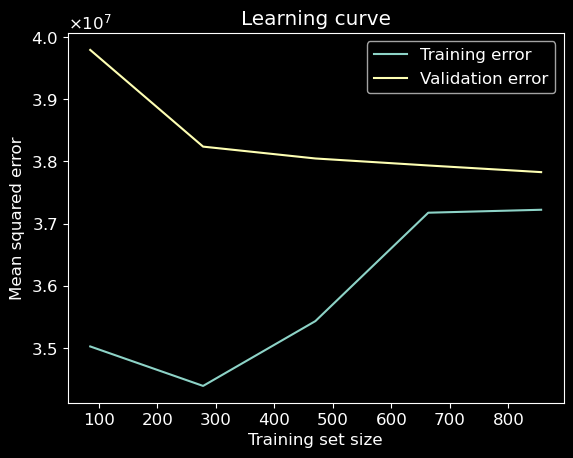

In [112]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(enet, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted Test

In [113]:
y_pred_test= enet.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [ 8927.29269353  7147.22396479 36764.64579471  9511.47062191
 26976.02828396 10832.97983864   292.38299414 16920.35146213
  1101.16265474 11265.82926313 27974.66952973  9443.85620589
  5369.27505053 38356.51425685 40178.39724837 37043.47287387
 15287.56588511 35858.04768891  9184.08528695 31412.851015
  3840.58202125 10086.55447668  2387.22526302  7139.38545035
 11341.85205102 12899.78389426 14428.39350174  6246.67210187
  9915.93091663  2316.27114111  9069.2037073  13105.68048858
  4683.32232294  3498.96201064  4458.50198367 12988.12216068
  1987.05546038  8770.05002291 33202.3053534  32561.3498179
  3903.92384823  4435.40728782 14066.05990547 11463.34153215
  8868.07737094 12028.21348581  5381.40770225  3144.20430103
 35447.64974807  9245.68844962 15867.53586798  2479.25901351
 12419.94670715  1509.38572931 13442.34317555 12519.63501546
  4344.04721651 32129.72164127 13246.49738232 12836.51391667
 14083.80333861 10593.3501496  16271.94496047  7827.61202343
 11783.4274092

### Test Scores

In [114]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.7830951119294642
MAE: 4197.034680050691
MSE: 33674208.72731579
Adjusted R-squared: 0.7806302836559355


### Residual Plot

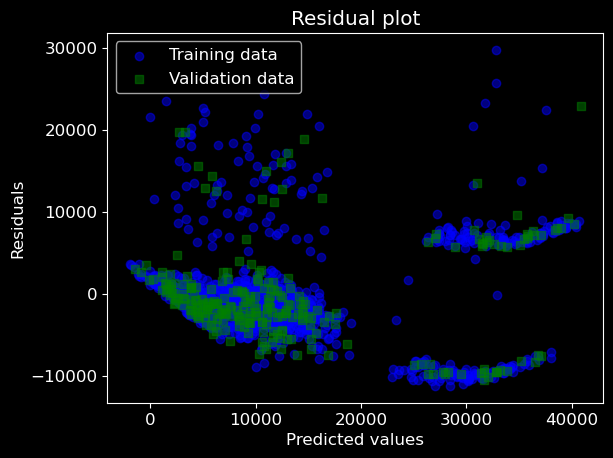

In [115]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

### CatBoostRegressor

### GridsearchCV

In [116]:
# Set up the CatBoostRegressor model
model = CatBoostRegressor()

# Set up the hyperparameter grid for tuning
param_grid = {
    'iterations': [100, 500],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 5, 7],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

# Fit the model on the training data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters and corresponding RMSE
print("Best hyperparameters: ", grid_search.best_params_)

0:	learn: 11927.3842515	total: 138ms	remaining: 1m 8s
1:	learn: 11837.3499877	total: 139ms	remaining: 34.5s
2:	learn: 11755.6220254	total: 139ms	remaining: 23s
3:	learn: 11663.9470845	total: 140ms	remaining: 17.3s
4:	learn: 11574.3003183	total: 141ms	remaining: 13.9s
5:	learn: 11491.6723981	total: 141ms	remaining: 11.6s
6:	learn: 11408.7415588	total: 142ms	remaining: 10s
7:	learn: 11320.9082019	total: 144ms	remaining: 8.87s
8:	learn: 11246.8236407	total: 145ms	remaining: 7.9s
9:	learn: 11169.7635196	total: 145ms	remaining: 7.12s
10:	learn: 11084.9991853	total: 146ms	remaining: 6.48s
11:	learn: 11001.6940970	total: 147ms	remaining: 5.96s
12:	learn: 10919.8389822	total: 147ms	remaining: 5.51s
13:	learn: 10845.5291254	total: 149ms	remaining: 5.17s
14:	learn: 10772.6675184	total: 150ms	remaining: 4.84s
15:	learn: 10699.3130822	total: 150ms	remaining: 4.55s
16:	learn: 10626.9001395	total: 151ms	remaining: 4.29s
17:	learn: 10550.5164506	total: 152ms	remaining: 4.07s
18:	learn: 10473.5556506	

243:	learn: 4822.1626201	total: 319ms	remaining: 335ms
244:	learn: 4817.7500368	total: 319ms	remaining: 332ms
245:	learn: 4814.9215773	total: 320ms	remaining: 331ms
246:	learn: 4810.8162864	total: 321ms	remaining: 328ms
247:	learn: 4807.7292344	total: 321ms	remaining: 326ms
248:	learn: 4802.9155726	total: 322ms	remaining: 324ms
249:	learn: 4797.9811094	total: 322ms	remaining: 322ms
250:	learn: 4794.6623796	total: 323ms	remaining: 320ms
251:	learn: 4790.9318810	total: 324ms	remaining: 319ms
252:	learn: 4787.7227904	total: 325ms	remaining: 318ms
253:	learn: 4783.1518213	total: 326ms	remaining: 316ms
254:	learn: 4778.7753839	total: 327ms	remaining: 314ms
255:	learn: 4775.1182557	total: 327ms	remaining: 312ms
256:	learn: 4771.8791960	total: 328ms	remaining: 310ms
257:	learn: 4768.1005950	total: 329ms	remaining: 309ms
258:	learn: 4764.9978781	total: 330ms	remaining: 307ms
259:	learn: 4761.1396054	total: 331ms	remaining: 305ms
260:	learn: 4758.0165292	total: 331ms	remaining: 303ms
261:	learn

In [117]:
# Build the final model using the best hyperparameters
cb = CatBoostRegressor(**grid_search.best_params_)

In [118]:
cb.fit(X_train_transformed, y_train)

0:	learn: 11927.3842515	total: 671us	remaining: 335ms
1:	learn: 11837.3499877	total: 1.43ms	remaining: 357ms
2:	learn: 11755.6220254	total: 1.95ms	remaining: 323ms
3:	learn: 11663.9470845	total: 2.44ms	remaining: 303ms
4:	learn: 11574.3003183	total: 2.93ms	remaining: 290ms
5:	learn: 11491.6723981	total: 3.46ms	remaining: 285ms
6:	learn: 11408.7415588	total: 3.97ms	remaining: 280ms
7:	learn: 11320.9082019	total: 4.5ms	remaining: 277ms
8:	learn: 11246.8236407	total: 4.97ms	remaining: 271ms
9:	learn: 11169.7635196	total: 5.45ms	remaining: 267ms
10:	learn: 11084.9991853	total: 5.91ms	remaining: 263ms
11:	learn: 11001.6940970	total: 6.44ms	remaining: 262ms
12:	learn: 10919.8389822	total: 7.06ms	remaining: 264ms
13:	learn: 10845.5291254	total: 7.65ms	remaining: 266ms
14:	learn: 10772.6675184	total: 8.17ms	remaining: 264ms
15:	learn: 10699.3130822	total: 8.69ms	remaining: 263ms
16:	learn: 10626.9001395	total: 9.2ms	remaining: 261ms
17:	learn: 10550.5164506	total: 9.73ms	remaining: 261ms
18:	l

306:	learn: 4644.4971013	total: 182ms	remaining: 114ms
307:	learn: 4642.2900675	total: 183ms	remaining: 114ms
308:	learn: 4640.2991701	total: 184ms	remaining: 114ms
309:	learn: 4638.6589065	total: 185ms	remaining: 113ms
310:	learn: 4636.6580698	total: 185ms	remaining: 113ms
311:	learn: 4634.4590191	total: 186ms	remaining: 112ms
312:	learn: 4632.6546730	total: 187ms	remaining: 111ms
313:	learn: 4631.1842402	total: 187ms	remaining: 111ms
314:	learn: 4629.5952091	total: 188ms	remaining: 110ms
315:	learn: 4627.6627603	total: 188ms	remaining: 110ms
316:	learn: 4625.7966575	total: 189ms	remaining: 109ms
317:	learn: 4624.3450042	total: 190ms	remaining: 109ms
318:	learn: 4622.1687481	total: 190ms	remaining: 108ms
319:	learn: 4620.9141227	total: 191ms	remaining: 108ms
320:	learn: 4618.4645323	total: 192ms	remaining: 107ms
321:	learn: 4617.2030177	total: 193ms	remaining: 107ms
322:	learn: 4615.7241081	total: 194ms	remaining: 106ms
323:	learn: 4613.9539075	total: 194ms	remaining: 105ms
324:	learn

### Predicted Training

In [119]:
y_pred_train = cb.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [ 9928.48776577 10163.05955827 11629.92667394 ... 12564.2754349
 40116.14516228 12025.26225464]


### Training Scores

In [120]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8627542768429244
MAE: 2541.800783571632
MSE: 19809172.31809482
Adjusted R-squared: 0.8623680318434204


### Learning Curve

0:	learn: 12790.6578890	total: 717us	remaining: 358ms
1:	learn: 12712.6521423	total: 1.1ms	remaining: 274ms
2:	learn: 12646.5185473	total: 1.42ms	remaining: 235ms
3:	learn: 12585.7820587	total: 1.67ms	remaining: 207ms
4:	learn: 12518.2906645	total: 1.91ms	remaining: 189ms
5:	learn: 12437.7616176	total: 2.16ms	remaining: 178ms
6:	learn: 12362.9806981	total: 2.4ms	remaining: 169ms
7:	learn: 12289.7217054	total: 2.65ms	remaining: 163ms
8:	learn: 12222.8733003	total: 2.9ms	remaining: 158ms
9:	learn: 12153.2363809	total: 3.21ms	remaining: 157ms
10:	learn: 12075.9569683	total: 3.5ms	remaining: 155ms
11:	learn: 12019.0014590	total: 3.78ms	remaining: 154ms
12:	learn: 11956.2803381	total: 4.06ms	remaining: 152ms
13:	learn: 11885.9660522	total: 4.33ms	remaining: 150ms
14:	learn: 11829.4205676	total: 4.61ms	remaining: 149ms
15:	learn: 11757.9935868	total: 4.86ms	remaining: 147ms
16:	learn: 11691.9327068	total: 5.26ms	remaining: 149ms
17:	learn: 11631.4008938	total: 5.51ms	remaining: 148ms
18:	lea

235:	learn: 4732.3314534	total: 75.4ms	remaining: 84.3ms
236:	learn: 4721.2844853	total: 75.8ms	remaining: 84.1ms
237:	learn: 4706.6603182	total: 76.1ms	remaining: 83.8ms
238:	learn: 4696.4576288	total: 76.4ms	remaining: 83.4ms
239:	learn: 4688.2243758	total: 76.7ms	remaining: 83.1ms
240:	learn: 4678.1559948	total: 76.9ms	remaining: 82.7ms
241:	learn: 4664.8451033	total: 77.2ms	remaining: 82.3ms
242:	learn: 4653.7882131	total: 77.5ms	remaining: 82ms
243:	learn: 4638.6396356	total: 77.8ms	remaining: 81.6ms
244:	learn: 4626.0522912	total: 78ms	remaining: 81.2ms
245:	learn: 4618.5051937	total: 78.3ms	remaining: 80.8ms
246:	learn: 4608.6221056	total: 78.5ms	remaining: 80.4ms
247:	learn: 4600.1406477	total: 78.7ms	remaining: 80ms
248:	learn: 4589.3566399	total: 78.9ms	remaining: 79.6ms
249:	learn: 4575.6754075	total: 79.2ms	remaining: 79.2ms
250:	learn: 4564.6207219	total: 79.5ms	remaining: 78.8ms
251:	learn: 4550.8780145	total: 79.8ms	remaining: 78.5ms
252:	learn: 4540.7308952	total: 80ms	

0:	learn: 12911.0183411	total: 637us	remaining: 318ms
1:	learn: 12809.5078119	total: 1.38ms	remaining: 344ms
2:	learn: 12725.8586335	total: 1.75ms	remaining: 290ms
3:	learn: 12636.3168185	total: 2.11ms	remaining: 261ms
4:	learn: 12555.6660011	total: 2.38ms	remaining: 236ms
5:	learn: 12473.7330164	total: 2.74ms	remaining: 225ms
6:	learn: 12380.0060995	total: 3.15ms	remaining: 222ms
7:	learn: 12286.2446715	total: 3.61ms	remaining: 222ms
8:	learn: 12193.5993693	total: 4.04ms	remaining: 221ms
9:	learn: 12097.9995491	total: 4.38ms	remaining: 214ms
10:	learn: 12010.5150025	total: 4.72ms	remaining: 210ms
11:	learn: 11923.9565095	total: 5.18ms	remaining: 211ms
12:	learn: 11845.4413347	total: 5.6ms	remaining: 210ms
13:	learn: 11757.2567408	total: 6.14ms	remaining: 213ms
14:	learn: 11677.4601011	total: 6.63ms	remaining: 215ms
15:	learn: 11596.1243570	total: 7.01ms	remaining: 212ms
16:	learn: 11519.7983810	total: 7.41ms	remaining: 211ms
17:	learn: 11440.1892982	total: 7.83ms	remaining: 210ms
18:	

403:	learn: 3402.3316603	total: 173ms	remaining: 41.2ms
404:	learn: 3400.7644803	total: 174ms	remaining: 40.8ms
405:	learn: 3397.4988809	total: 175ms	remaining: 40.5ms
406:	learn: 3395.1956795	total: 175ms	remaining: 40ms
407:	learn: 3393.3549522	total: 176ms	remaining: 39.6ms
408:	learn: 3390.4591733	total: 176ms	remaining: 39.1ms
409:	learn: 3387.9835342	total: 176ms	remaining: 38.7ms
410:	learn: 3386.5642420	total: 177ms	remaining: 38.3ms
411:	learn: 3384.2467393	total: 178ms	remaining: 37.9ms
412:	learn: 3382.2941034	total: 178ms	remaining: 37.5ms
413:	learn: 3381.6380097	total: 178ms	remaining: 37.1ms
414:	learn: 3378.9980208	total: 179ms	remaining: 36.6ms
415:	learn: 3376.7575463	total: 179ms	remaining: 36.2ms
416:	learn: 3374.5305408	total: 180ms	remaining: 35.8ms
417:	learn: 3372.6425926	total: 180ms	remaining: 35.4ms
418:	learn: 3371.0454732	total: 181ms	remaining: 34.9ms
419:	learn: 3369.3488637	total: 181ms	remaining: 34.5ms
420:	learn: 3368.0095927	total: 182ms	remaining: 3

168:	learn: 5088.4039785	total: 64.2ms	remaining: 126ms
169:	learn: 5072.4737248	total: 65ms	remaining: 126ms
170:	learn: 5058.9571481	total: 65.5ms	remaining: 126ms
171:	learn: 5044.5773508	total: 65.9ms	remaining: 126ms
172:	learn: 5033.1328567	total: 66.3ms	remaining: 125ms
173:	learn: 5020.3966691	total: 66.9ms	remaining: 125ms
174:	learn: 5006.1894465	total: 67.4ms	remaining: 125ms
175:	learn: 4993.0639682	total: 67.8ms	remaining: 125ms
176:	learn: 4982.7584746	total: 68.2ms	remaining: 125ms
177:	learn: 4970.6562590	total: 68.8ms	remaining: 124ms
178:	learn: 4959.1456992	total: 69.3ms	remaining: 124ms
179:	learn: 4944.4596125	total: 69.8ms	remaining: 124ms
180:	learn: 4932.5593718	total: 70.2ms	remaining: 124ms
181:	learn: 4922.3573888	total: 70.9ms	remaining: 124ms
182:	learn: 4908.5069486	total: 71.5ms	remaining: 124ms
183:	learn: 4897.7317468	total: 72ms	remaining: 124ms
184:	learn: 4887.9526887	total: 72.6ms	remaining: 124ms
185:	learn: 4876.3272560	total: 73.1ms	remaining: 12

436:	learn: 3994.4753679	total: 181ms	remaining: 26.1ms
437:	learn: 3993.5005657	total: 181ms	remaining: 25.7ms
438:	learn: 3991.8573144	total: 182ms	remaining: 25.3ms
439:	learn: 3991.1708283	total: 182ms	remaining: 24.9ms
440:	learn: 3989.2954710	total: 183ms	remaining: 24.5ms
441:	learn: 3988.0848719	total: 183ms	remaining: 24.1ms
442:	learn: 3987.2473270	total: 184ms	remaining: 23.7ms
443:	learn: 3986.4368758	total: 184ms	remaining: 23.3ms
444:	learn: 3985.2583482	total: 185ms	remaining: 22.8ms
445:	learn: 3984.4062879	total: 185ms	remaining: 22.4ms
446:	learn: 3983.6590699	total: 186ms	remaining: 22ms
447:	learn: 3982.0991984	total: 186ms	remaining: 21.6ms
448:	learn: 3981.5041743	total: 187ms	remaining: 21.2ms
449:	learn: 3980.1771581	total: 187ms	remaining: 20.8ms
450:	learn: 3978.7913550	total: 188ms	remaining: 20.4ms
451:	learn: 3977.8250188	total: 188ms	remaining: 20ms
452:	learn: 3976.8732117	total: 189ms	remaining: 19.6ms
453:	learn: 3976.1221790	total: 189ms	remaining: 19.

203:	learn: 4926.9742481	total: 91.5ms	remaining: 133ms
204:	learn: 4920.7563293	total: 92.3ms	remaining: 133ms
205:	learn: 4913.5025526	total: 92.7ms	remaining: 132ms
206:	learn: 4907.1614267	total: 93.2ms	remaining: 132ms
207:	learn: 4900.9536919	total: 93.6ms	remaining: 131ms
208:	learn: 4894.8689892	total: 94ms	remaining: 131ms
209:	learn: 4887.6564999	total: 94.4ms	remaining: 130ms
210:	learn: 4879.0017415	total: 94.8ms	remaining: 130ms
211:	learn: 4871.6676094	total: 95.1ms	remaining: 129ms
212:	learn: 4864.6076736	total: 95.5ms	remaining: 129ms
213:	learn: 4858.6190587	total: 95.9ms	remaining: 128ms
214:	learn: 4852.0393535	total: 96.3ms	remaining: 128ms
215:	learn: 4845.7187651	total: 96.7ms	remaining: 127ms
216:	learn: 4840.4220517	total: 97.1ms	remaining: 127ms
217:	learn: 4834.5905425	total: 97.5ms	remaining: 126ms
218:	learn: 4829.2372806	total: 98.1ms	remaining: 126ms
219:	learn: 4823.0229714	total: 98.6ms	remaining: 125ms
220:	learn: 4815.5750619	total: 99.1ms	remaining: 

366:	learn: 4403.3526513	total: 169ms	remaining: 61.4ms
367:	learn: 4402.7013037	total: 170ms	remaining: 61.1ms
368:	learn: 4401.9339483	total: 171ms	remaining: 60.7ms
369:	learn: 4400.0308064	total: 172ms	remaining: 60.3ms
370:	learn: 4398.6240823	total: 172ms	remaining: 59.8ms
371:	learn: 4396.9686738	total: 173ms	remaining: 59.4ms
372:	learn: 4395.1875521	total: 173ms	remaining: 58.9ms
373:	learn: 4393.7235977	total: 174ms	remaining: 58.5ms
374:	learn: 4391.7994538	total: 174ms	remaining: 58ms
375:	learn: 4389.8087450	total: 174ms	remaining: 57.5ms
376:	learn: 4388.2288506	total: 175ms	remaining: 57.1ms
377:	learn: 4387.0531924	total: 175ms	remaining: 56.6ms
378:	learn: 4386.2547251	total: 176ms	remaining: 56.1ms
379:	learn: 4384.6204302	total: 176ms	remaining: 55.6ms
380:	learn: 4383.5836482	total: 177ms	remaining: 55.2ms
381:	learn: 4382.8050468	total: 177ms	remaining: 54.7ms
382:	learn: 4381.7821057	total: 178ms	remaining: 54.3ms
383:	learn: 4380.3605580	total: 178ms	remaining: 5

159:	learn: 5402.8934316	total: 73.7ms	remaining: 157ms
160:	learn: 5389.7969353	total: 74.5ms	remaining: 157ms
161:	learn: 5377.1046495	total: 74.9ms	remaining: 156ms
162:	learn: 5365.1169470	total: 75.4ms	remaining: 156ms
163:	learn: 5354.9545566	total: 75.9ms	remaining: 156ms
164:	learn: 5341.2788490	total: 76.5ms	remaining: 155ms
165:	learn: 5327.9097619	total: 77ms	remaining: 155ms
166:	learn: 5314.7659570	total: 77.5ms	remaining: 155ms
167:	learn: 5303.2831342	total: 78ms	remaining: 154ms
168:	learn: 5290.2574482	total: 78.4ms	remaining: 154ms
169:	learn: 5277.4781454	total: 78.8ms	remaining: 153ms
170:	learn: 5266.0103287	total: 79.2ms	remaining: 152ms
171:	learn: 5254.5384006	total: 79.6ms	remaining: 152ms
172:	learn: 5244.7792167	total: 80.1ms	remaining: 151ms
173:	learn: 5233.4495373	total: 80.5ms	remaining: 151ms
174:	learn: 5223.3583541	total: 80.9ms	remaining: 150ms
175:	learn: 5212.6380341	total: 81.3ms	remaining: 150ms
176:	learn: 5203.2722575	total: 81.6ms	remaining: 14

375:	learn: 4475.2651717	total: 167ms	remaining: 55.2ms
376:	learn: 4474.5980038	total: 168ms	remaining: 54.8ms
377:	learn: 4474.0784472	total: 169ms	remaining: 54.4ms
378:	learn: 4473.1840224	total: 169ms	remaining: 54ms
379:	learn: 4471.5880247	total: 170ms	remaining: 53.6ms
380:	learn: 4470.5293224	total: 170ms	remaining: 53.1ms
381:	learn: 4469.5917231	total: 171ms	remaining: 52.7ms
382:	learn: 4468.2719169	total: 171ms	remaining: 52.3ms
383:	learn: 4466.9896467	total: 172ms	remaining: 51.8ms
384:	learn: 4466.1472143	total: 172ms	remaining: 51.4ms
385:	learn: 4464.5190444	total: 173ms	remaining: 51ms
386:	learn: 4463.7269081	total: 173ms	remaining: 50.5ms
387:	learn: 4462.9043333	total: 174ms	remaining: 50.1ms
388:	learn: 4461.9642395	total: 174ms	remaining: 49.7ms
389:	learn: 4460.6313996	total: 175ms	remaining: 49.2ms
390:	learn: 4459.9353510	total: 175ms	remaining: 48.8ms
391:	learn: 4459.0053075	total: 175ms	remaining: 48.3ms
392:	learn: 4457.4905907	total: 176ms	remaining: 47.

234:	learn: 5417.9298785	total: 64.9ms	remaining: 73.1ms
235:	learn: 5412.1376235	total: 65.4ms	remaining: 73.1ms
236:	learn: 5404.1860137	total: 65.7ms	remaining: 72.9ms
237:	learn: 5398.5503577	total: 66ms	remaining: 72.6ms
238:	learn: 5387.6876044	total: 66.3ms	remaining: 72.4ms
239:	learn: 5380.9721439	total: 66.6ms	remaining: 72.1ms
240:	learn: 5376.3157525	total: 66.9ms	remaining: 71.9ms
241:	learn: 5368.2544830	total: 67.2ms	remaining: 71.6ms
242:	learn: 5360.8532003	total: 67.4ms	remaining: 71.3ms
243:	learn: 5354.7339663	total: 67.7ms	remaining: 71ms
244:	learn: 5347.6124686	total: 68ms	remaining: 70.8ms
245:	learn: 5338.6228456	total: 68.3ms	remaining: 70.5ms
246:	learn: 5332.2169843	total: 68.6ms	remaining: 70.3ms
247:	learn: 5324.1036581	total: 69ms	remaining: 70.1ms
248:	learn: 5321.4473252	total: 69.4ms	remaining: 69.9ms
249:	learn: 5315.3061505	total: 69.8ms	remaining: 69.8ms
250:	learn: 5308.3303438	total: 70.1ms	remaining: 69.5ms
251:	learn: 5302.6142162	total: 70.4ms	

0:	learn: 12277.0688687	total: 599us	remaining: 299ms
1:	learn: 12187.5652107	total: 1.41ms	remaining: 351ms
2:	learn: 12113.4294185	total: 1.87ms	remaining: 309ms
3:	learn: 12033.2887568	total: 2.31ms	remaining: 287ms
4:	learn: 11959.6998421	total: 2.63ms	remaining: 260ms
5:	learn: 11878.0032021	total: 3.06ms	remaining: 252ms
6:	learn: 11792.6854959	total: 3.47ms	remaining: 245ms
7:	learn: 11713.2169458	total: 3.85ms	remaining: 237ms
8:	learn: 11629.6754151	total: 4.22ms	remaining: 230ms
9:	learn: 11544.1406806	total: 4.55ms	remaining: 223ms
10:	learn: 11468.1546740	total: 4.92ms	remaining: 219ms
11:	learn: 11392.6110638	total: 5.32ms	remaining: 216ms
12:	learn: 11325.5824737	total: 5.63ms	remaining: 211ms
13:	learn: 11250.0312651	total: 5.97ms	remaining: 207ms
14:	learn: 11176.1352542	total: 6.32ms	remaining: 204ms
15:	learn: 11099.2065976	total: 6.64ms	remaining: 201ms
16:	learn: 11028.4366107	total: 6.97ms	remaining: 198ms
17:	learn: 10956.8191478	total: 7.27ms	remaining: 195ms
18:

453:	learn: 4212.6194150	total: 175ms	remaining: 17.7ms
454:	learn: 4211.3976127	total: 175ms	remaining: 17.4ms
455:	learn: 4209.9881218	total: 176ms	remaining: 17ms
456:	learn: 4209.1074512	total: 176ms	remaining: 16.6ms
457:	learn: 4207.0833999	total: 177ms	remaining: 16.2ms
458:	learn: 4205.4167571	total: 177ms	remaining: 15.8ms
459:	learn: 4203.7318029	total: 177ms	remaining: 15.4ms
460:	learn: 4202.1022518	total: 178ms	remaining: 15ms
461:	learn: 4200.9463283	total: 178ms	remaining: 14.6ms
462:	learn: 4200.1304852	total: 178ms	remaining: 14.3ms
463:	learn: 4199.3430033	total: 179ms	remaining: 13.9ms
464:	learn: 4197.1177214	total: 179ms	remaining: 13.5ms
465:	learn: 4195.9540011	total: 179ms	remaining: 13.1ms
466:	learn: 4195.3586572	total: 180ms	remaining: 12.7ms
467:	learn: 4194.0949274	total: 180ms	remaining: 12.3ms
468:	learn: 4192.9401116	total: 180ms	remaining: 11.9ms
469:	learn: 4191.8721588	total: 181ms	remaining: 11.5ms
470:	learn: 4190.1397343	total: 181ms	remaining: 11.

294:	learn: 4703.3481757	total: 116ms	remaining: 80.5ms
295:	learn: 4700.5230080	total: 116ms	remaining: 80.1ms
296:	learn: 4697.4152692	total: 117ms	remaining: 79.7ms
297:	learn: 4695.6913001	total: 117ms	remaining: 79.4ms
298:	learn: 4693.4170255	total: 117ms	remaining: 79ms
299:	learn: 4691.0180046	total: 118ms	remaining: 78.5ms
300:	learn: 4688.7123352	total: 118ms	remaining: 78.2ms
301:	learn: 4686.5042488	total: 119ms	remaining: 77.8ms
302:	learn: 4683.4806226	total: 119ms	remaining: 77.5ms
303:	learn: 4681.5852588	total: 120ms	remaining: 77.1ms
304:	learn: 4678.7564586	total: 120ms	remaining: 76.7ms
305:	learn: 4675.7298578	total: 120ms	remaining: 76.2ms
306:	learn: 4673.9564946	total: 121ms	remaining: 75.9ms
307:	learn: 4672.1633004	total: 121ms	remaining: 75.5ms
308:	learn: 4669.9107837	total: 121ms	remaining: 75.1ms
309:	learn: 4667.8857388	total: 122ms	remaining: 74.6ms
310:	learn: 4665.2593565	total: 122ms	remaining: 74.3ms
311:	learn: 4663.0237940	total: 123ms	remaining: 7

68:	learn: 7735.9109176	total: 32.7ms	remaining: 204ms
69:	learn: 7701.3262304	total: 33.3ms	remaining: 205ms
70:	learn: 7663.6635845	total: 33.7ms	remaining: 204ms
71:	learn: 7627.9501980	total: 34.2ms	remaining: 203ms
72:	learn: 7586.4961885	total: 34.6ms	remaining: 203ms
73:	learn: 7555.4974309	total: 35.1ms	remaining: 202ms
74:	learn: 7513.9659637	total: 35.6ms	remaining: 202ms
75:	learn: 7474.1965864	total: 36ms	remaining: 201ms
76:	learn: 7440.1744170	total: 36.5ms	remaining: 200ms
77:	learn: 7400.8859092	total: 36.9ms	remaining: 200ms
78:	learn: 7363.9215587	total: 37.4ms	remaining: 199ms
79:	learn: 7326.6668372	total: 37.9ms	remaining: 199ms
80:	learn: 7291.2928917	total: 38.4ms	remaining: 199ms
81:	learn: 7260.3268227	total: 38.9ms	remaining: 198ms
82:	learn: 7229.2781227	total: 39.4ms	remaining: 198ms
83:	learn: 7206.4220438	total: 39.8ms	remaining: 197ms
84:	learn: 7170.1156398	total: 40.4ms	remaining: 197ms
85:	learn: 7140.5811640	total: 40.9ms	remaining: 197ms
86:	learn: 7

426:	learn: 4669.2055973	total: 202ms	remaining: 34.5ms
427:	learn: 4668.1733474	total: 203ms	remaining: 34.1ms
428:	learn: 4667.0678532	total: 203ms	remaining: 33.6ms
429:	learn: 4666.1130478	total: 204ms	remaining: 33.2ms
430:	learn: 4665.3666763	total: 204ms	remaining: 32.7ms
431:	learn: 4664.1882173	total: 204ms	remaining: 32.2ms
432:	learn: 4663.0388685	total: 205ms	remaining: 31.7ms
433:	learn: 4662.3070518	total: 205ms	remaining: 31.2ms
434:	learn: 4660.6684618	total: 206ms	remaining: 30.8ms
435:	learn: 4659.7430934	total: 206ms	remaining: 30.3ms
436:	learn: 4658.4116479	total: 207ms	remaining: 29.8ms
437:	learn: 4657.6550948	total: 207ms	remaining: 29.3ms
438:	learn: 4656.8683208	total: 207ms	remaining: 28.8ms
439:	learn: 4656.2409648	total: 208ms	remaining: 28.3ms
440:	learn: 4655.7618506	total: 208ms	remaining: 27.9ms
441:	learn: 4654.9620225	total: 209ms	remaining: 27.4ms
442:	learn: 4654.2932209	total: 209ms	remaining: 26.9ms
443:	learn: 4653.4443689	total: 210ms	remaining:

116:	learn: 6323.0896510	total: 57.3ms	remaining: 188ms
117:	learn: 6300.8452669	total: 58ms	remaining: 188ms
118:	learn: 6277.7745592	total: 58.5ms	remaining: 187ms
119:	learn: 6258.7721870	total: 59ms	remaining: 187ms
120:	learn: 6239.4388288	total: 59.5ms	remaining: 186ms
121:	learn: 6218.0475723	total: 60ms	remaining: 186ms
122:	learn: 6195.9910818	total: 60.4ms	remaining: 185ms
123:	learn: 6178.3530183	total: 60.9ms	remaining: 185ms
124:	learn: 6162.0502595	total: 61.5ms	remaining: 185ms
125:	learn: 6140.9710215	total: 62.1ms	remaining: 184ms
126:	learn: 6123.5302077	total: 62.6ms	remaining: 184ms
127:	learn: 6102.4704497	total: 63.2ms	remaining: 184ms
128:	learn: 6090.7463978	total: 63.6ms	remaining: 183ms
129:	learn: 6069.9311875	total: 65.1ms	remaining: 185ms
130:	learn: 6051.0660087	total: 65.6ms	remaining: 185ms
131:	learn: 6035.9511159	total: 66.1ms	remaining: 184ms
132:	learn: 6016.4466350	total: 66.6ms	remaining: 184ms
133:	learn: 5997.1543159	total: 67.1ms	remaining: 183m

287:	learn: 4884.0201553	total: 162ms	remaining: 119ms
288:	learn: 4881.4575324	total: 163ms	remaining: 119ms
289:	learn: 4879.1392526	total: 163ms	remaining: 118ms
290:	learn: 4877.0976823	total: 164ms	remaining: 118ms
291:	learn: 4874.3148555	total: 165ms	remaining: 117ms
292:	learn: 4872.6348640	total: 165ms	remaining: 117ms
293:	learn: 4870.2059696	total: 166ms	remaining: 116ms
294:	learn: 4867.6270240	total: 166ms	remaining: 116ms
295:	learn: 4865.6080557	total: 167ms	remaining: 115ms
296:	learn: 4862.7718524	total: 168ms	remaining: 115ms
297:	learn: 4860.4072343	total: 168ms	remaining: 114ms
298:	learn: 4858.8479912	total: 169ms	remaining: 114ms
299:	learn: 4856.3902848	total: 170ms	remaining: 113ms
300:	learn: 4854.9662078	total: 170ms	remaining: 113ms
301:	learn: 4853.1587933	total: 171ms	remaining: 112ms
302:	learn: 4850.4801517	total: 172ms	remaining: 112ms
303:	learn: 4848.1255243	total: 172ms	remaining: 111ms
304:	learn: 4846.4514232	total: 173ms	remaining: 110ms
305:	learn

0:	learn: 11248.5322573	total: 417us	remaining: 208ms
1:	learn: 11195.4076609	total: 994us	remaining: 248ms
2:	learn: 11139.4509517	total: 1.29ms	remaining: 215ms
3:	learn: 11083.3268472	total: 1.57ms	remaining: 195ms
4:	learn: 11028.1775873	total: 1.85ms	remaining: 183ms
5:	learn: 10975.1994137	total: 2.13ms	remaining: 175ms
6:	learn: 10923.0283777	total: 2.39ms	remaining: 168ms
7:	learn: 10865.7662049	total: 2.63ms	remaining: 162ms
8:	learn: 10806.8911689	total: 2.9ms	remaining: 158ms
9:	learn: 10753.4576928	total: 3.15ms	remaining: 154ms
10:	learn: 10692.3776276	total: 3.4ms	remaining: 151ms
11:	learn: 10646.1323417	total: 3.66ms	remaining: 149ms
12:	learn: 10595.0581067	total: 3.92ms	remaining: 147ms
13:	learn: 10545.1071342	total: 4.18ms	remaining: 145ms
14:	learn: 10502.4199780	total: 4.45ms	remaining: 144ms
15:	learn: 10448.3082122	total: 4.72ms	remaining: 143ms
16:	learn: 10390.3740476	total: 5.02ms	remaining: 143ms
17:	learn: 10340.1345073	total: 5.3ms	remaining: 142ms
18:	lea

450:	learn: 4444.0685288	total: 153ms	remaining: 16.6ms
451:	learn: 4442.3082741	total: 154ms	remaining: 16.3ms
452:	learn: 4439.2454164	total: 154ms	remaining: 16ms
453:	learn: 4436.6375706	total: 154ms	remaining: 15.6ms
454:	learn: 4435.0448017	total: 155ms	remaining: 15.3ms
455:	learn: 4432.4443416	total: 155ms	remaining: 15ms
456:	learn: 4429.5825277	total: 155ms	remaining: 14.6ms
457:	learn: 4426.5188065	total: 156ms	remaining: 14.3ms
458:	learn: 4421.4093732	total: 156ms	remaining: 13.9ms
459:	learn: 4418.9538925	total: 156ms	remaining: 13.6ms
460:	learn: 4417.1514270	total: 156ms	remaining: 13.2ms
461:	learn: 4413.7994196	total: 157ms	remaining: 12.9ms
462:	learn: 4408.5624307	total: 157ms	remaining: 12.5ms
463:	learn: 4404.2055992	total: 158ms	remaining: 12.3ms
464:	learn: 4402.2546281	total: 158ms	remaining: 11.9ms
465:	learn: 4399.4923216	total: 159ms	remaining: 11.6ms
466:	learn: 4394.4975930	total: 159ms	remaining: 11.2ms
467:	learn: 4391.4383074	total: 159ms	remaining: 10.

367:	learn: 4419.6933458	total: 162ms	remaining: 58.3ms
368:	learn: 4417.1613607	total: 163ms	remaining: 58ms
369:	learn: 4414.3508241	total: 164ms	remaining: 57.5ms
370:	learn: 4410.9895681	total: 164ms	remaining: 57ms
371:	learn: 4409.0355656	total: 164ms	remaining: 56.6ms
372:	learn: 4406.6987999	total: 165ms	remaining: 56.1ms
373:	learn: 4405.3228347	total: 165ms	remaining: 55.7ms
374:	learn: 4403.4456960	total: 166ms	remaining: 55.2ms
375:	learn: 4400.6184358	total: 166ms	remaining: 54.7ms
376:	learn: 4397.6974060	total: 166ms	remaining: 54.3ms
377:	learn: 4396.1446405	total: 167ms	remaining: 53.8ms
378:	learn: 4393.9392094	total: 167ms	remaining: 53.3ms
379:	learn: 4392.9570194	total: 167ms	remaining: 52.9ms
380:	learn: 4391.7115460	total: 168ms	remaining: 52.4ms
381:	learn: 4390.0151884	total: 168ms	remaining: 52ms
382:	learn: 4387.9121212	total: 169ms	remaining: 51.5ms
383:	learn: 4386.3600726	total: 169ms	remaining: 51.1ms
384:	learn: 4384.0400837	total: 170ms	remaining: 50.6m

358:	learn: 4164.1411812	total: 166ms	remaining: 65.3ms
359:	learn: 4162.0692427	total: 167ms	remaining: 64.9ms
360:	learn: 4160.2239676	total: 167ms	remaining: 64.4ms
361:	learn: 4157.9355504	total: 168ms	remaining: 63.9ms
362:	learn: 4155.6614220	total: 168ms	remaining: 63.4ms
363:	learn: 4154.1074207	total: 169ms	remaining: 63ms
364:	learn: 4153.0024332	total: 169ms	remaining: 62.5ms
365:	learn: 4150.4963285	total: 169ms	remaining: 62ms
366:	learn: 4148.3136547	total: 170ms	remaining: 61.5ms
367:	learn: 4146.8532635	total: 170ms	remaining: 61ms
368:	learn: 4144.8418156	total: 171ms	remaining: 60.5ms
369:	learn: 4143.0761882	total: 171ms	remaining: 60.1ms
370:	learn: 4141.1426719	total: 172ms	remaining: 59.6ms
371:	learn: 4140.2827692	total: 172ms	remaining: 59.2ms
372:	learn: 4138.2363806	total: 172ms	remaining: 58.7ms
373:	learn: 4136.1243020	total: 173ms	remaining: 58.3ms
374:	learn: 4134.0432361	total: 173ms	remaining: 57.8ms
375:	learn: 4132.0591511	total: 174ms	remaining: 57.4m

324:	learn: 4527.8695103	total: 173ms	remaining: 92.9ms
325:	learn: 4525.2833897	total: 173ms	remaining: 92.6ms
326:	learn: 4522.4817100	total: 174ms	remaining: 92ms
327:	learn: 4519.7262872	total: 174ms	remaining: 91.5ms
328:	learn: 4517.9933251	total: 175ms	remaining: 90.9ms
329:	learn: 4515.1416055	total: 175ms	remaining: 90.3ms
330:	learn: 4513.3249498	total: 176ms	remaining: 89.8ms
331:	learn: 4511.2718798	total: 176ms	remaining: 89.2ms
332:	learn: 4509.7002466	total: 177ms	remaining: 88.6ms
333:	learn: 4508.3889443	total: 177ms	remaining: 88.1ms
334:	learn: 4506.6491686	total: 178ms	remaining: 87.5ms
335:	learn: 4504.9286609	total: 178ms	remaining: 86.9ms
336:	learn: 4502.3959386	total: 179ms	remaining: 86.3ms
337:	learn: 4500.7207034	total: 179ms	remaining: 85.8ms
338:	learn: 4498.5638851	total: 179ms	remaining: 85.2ms
339:	learn: 4496.1335215	total: 180ms	remaining: 84.7ms
340:	learn: 4494.3145142	total: 180ms	remaining: 84.1ms
341:	learn: 4492.4170013	total: 181ms	remaining: 8

0:	learn: 12074.3636602	total: 693us	remaining: 346ms
1:	learn: 11981.1513719	total: 1.75ms	remaining: 437ms
2:	learn: 11898.7506325	total: 2.49ms	remaining: 413ms
3:	learn: 11806.0802247	total: 2.99ms	remaining: 371ms
4:	learn: 11736.1134102	total: 3.36ms	remaining: 333ms
5:	learn: 11656.3062433	total: 3.86ms	remaining: 318ms
6:	learn: 11572.4712328	total: 4.35ms	remaining: 306ms
7:	learn: 11489.6945062	total: 4.82ms	remaining: 297ms
8:	learn: 11407.4763784	total: 5.32ms	remaining: 290ms
9:	learn: 11320.1737684	total: 5.83ms	remaining: 286ms
10:	learn: 11242.1442224	total: 6.33ms	remaining: 281ms
11:	learn: 11164.1804340	total: 6.83ms	remaining: 278ms
12:	learn: 11079.8053809	total: 7.31ms	remaining: 274ms
13:	learn: 11003.6334726	total: 7.92ms	remaining: 275ms
14:	learn: 10926.3725317	total: 8.48ms	remaining: 274ms
15:	learn: 10851.5403339	total: 9.02ms	remaining: 273ms
16:	learn: 10781.4613625	total: 9.51ms	remaining: 270ms
17:	learn: 10708.4078878	total: 10ms	remaining: 269ms
18:	l

324:	learn: 4604.2532505	total: 179ms	remaining: 96.3ms
325:	learn: 4601.8782344	total: 180ms	remaining: 95.8ms
326:	learn: 4599.8656375	total: 180ms	remaining: 95.3ms
327:	learn: 4598.6581500	total: 181ms	remaining: 94.7ms
328:	learn: 4596.6849490	total: 181ms	remaining: 94.3ms
329:	learn: 4594.1451175	total: 182ms	remaining: 93.7ms
330:	learn: 4592.3572419	total: 182ms	remaining: 93.1ms
331:	learn: 4590.7692568	total: 183ms	remaining: 92.6ms
332:	learn: 4589.0021694	total: 183ms	remaining: 92ms
333:	learn: 4587.3663563	total: 184ms	remaining: 91.5ms
334:	learn: 4585.6521246	total: 185ms	remaining: 90.9ms
335:	learn: 4583.6717000	total: 185ms	remaining: 90.4ms
336:	learn: 4582.0448426	total: 186ms	remaining: 89.8ms
337:	learn: 4580.6139117	total: 186ms	remaining: 89.2ms
338:	learn: 4578.6567525	total: 187ms	remaining: 88.6ms
339:	learn: 4577.0036153	total: 187ms	remaining: 88.1ms
340:	learn: 4575.4897669	total: 188ms	remaining: 87.6ms
341:	learn: 4574.6586432	total: 188ms	remaining: 8

0:	learn: 11248.5322573	total: 434us	remaining: 217ms
1:	learn: 11195.4076609	total: 2.94ms	remaining: 733ms
2:	learn: 11139.4509517	total: 3.28ms	remaining: 544ms
3:	learn: 11083.3268472	total: 3.66ms	remaining: 454ms
4:	learn: 11028.1775873	total: 3.92ms	remaining: 388ms
5:	learn: 10975.1994137	total: 4.15ms	remaining: 341ms
6:	learn: 10923.0283777	total: 4.66ms	remaining: 328ms
7:	learn: 10865.7662049	total: 5ms	remaining: 307ms
8:	learn: 10806.8911689	total: 5.33ms	remaining: 291ms
9:	learn: 10753.4576928	total: 5.78ms	remaining: 283ms
10:	learn: 10692.3776276	total: 6.08ms	remaining: 270ms
11:	learn: 10646.1323417	total: 6.39ms	remaining: 260ms
12:	learn: 10595.0581067	total: 6.74ms	remaining: 252ms
13:	learn: 10545.1071342	total: 10.5ms	remaining: 366ms
14:	learn: 10502.4199780	total: 10.9ms	remaining: 353ms
15:	learn: 10448.3082122	total: 11.2ms	remaining: 339ms
16:	learn: 10390.3740476	total: 11.5ms	remaining: 327ms
17:	learn: 10340.1345073	total: 11.8ms	remaining: 316ms
18:	le

472:	learn: 4377.8227921	total: 167ms	remaining: 9.51ms
473:	learn: 4372.2704928	total: 167ms	remaining: 9.16ms
474:	learn: 4367.9320220	total: 167ms	remaining: 8.81ms
475:	learn: 4365.6291138	total: 168ms	remaining: 8.45ms
476:	learn: 4363.8936390	total: 168ms	remaining: 8.09ms
477:	learn: 4361.7429120	total: 168ms	remaining: 7.74ms
478:	learn: 4358.8458405	total: 168ms	remaining: 7.38ms
479:	learn: 4356.5917425	total: 169ms	remaining: 7.03ms
480:	learn: 4354.9249388	total: 169ms	remaining: 6.67ms
481:	learn: 4352.1096461	total: 169ms	remaining: 6.32ms
482:	learn: 4349.8901459	total: 169ms	remaining: 5.96ms
483:	learn: 4348.1534761	total: 170ms	remaining: 5.61ms
484:	learn: 4345.0377588	total: 170ms	remaining: 5.26ms
485:	learn: 4343.3046513	total: 170ms	remaining: 4.91ms
486:	learn: 4340.7402726	total: 171ms	remaining: 4.55ms
487:	learn: 4339.1384094	total: 171ms	remaining: 4.2ms
488:	learn: 4336.9967947	total: 171ms	remaining: 3.85ms
489:	learn: 4334.7249001	total: 172ms	remaining: 

155:	learn: 5768.8244095	total: 65.7ms	remaining: 145ms
156:	learn: 5754.1330917	total: 66.5ms	remaining: 145ms
157:	learn: 5739.2367622	total: 67ms	remaining: 145ms
158:	learn: 5725.4579087	total: 67.4ms	remaining: 145ms
159:	learn: 5707.0379140	total: 67.9ms	remaining: 144ms
160:	learn: 5691.9742990	total: 68.5ms	remaining: 144ms
161:	learn: 5678.4086872	total: 68.9ms	remaining: 144ms
162:	learn: 5663.2478621	total: 69.3ms	remaining: 143ms
163:	learn: 5648.6828022	total: 69.7ms	remaining: 143ms
164:	learn: 5634.6394851	total: 70.1ms	remaining: 142ms
165:	learn: 5617.9778316	total: 70.5ms	remaining: 142ms
166:	learn: 5605.0120528	total: 71ms	remaining: 142ms
167:	learn: 5592.5255469	total: 71.7ms	remaining: 142ms
168:	learn: 5580.0955786	total: 72.3ms	remaining: 142ms
169:	learn: 5572.0792071	total: 72.6ms	remaining: 141ms
170:	learn: 5559.3095833	total: 73ms	remaining: 140ms
171:	learn: 5543.3582052	total: 73.4ms	remaining: 140ms
172:	learn: 5529.8681752	total: 73.8ms	remaining: 139m

0:	learn: 12253.4085835	total: 689us	remaining: 344ms
1:	learn: 12161.4819861	total: 1.57ms	remaining: 392ms
2:	learn: 12075.9910728	total: 2.59ms	remaining: 429ms
3:	learn: 11982.0923745	total: 3.12ms	remaining: 387ms
4:	learn: 11908.1887041	total: 3.53ms	remaining: 349ms
5:	learn: 11825.3901933	total: 4.07ms	remaining: 335ms
6:	learn: 11738.2973728	total: 4.6ms	remaining: 324ms
7:	learn: 11652.0495766	total: 5.12ms	remaining: 315ms
8:	learn: 11565.8736411	total: 9.86ms	remaining: 538ms
9:	learn: 11476.6190219	total: 10.6ms	remaining: 521ms
10:	learn: 11396.4550241	total: 11.2ms	remaining: 496ms
11:	learn: 11316.5223230	total: 11.7ms	remaining: 475ms
12:	learn: 11244.7565077	total: 12.2ms	remaining: 458ms
13:	learn: 11165.4113395	total: 12.8ms	remaining: 446ms
14:	learn: 11084.3804673	total: 13.4ms	remaining: 432ms
15:	learn: 11009.5595392	total: 13.9ms	remaining: 420ms
16:	learn: 10935.9602215	total: 15.2ms	remaining: 432ms
17:	learn: 10860.2514752	total: 15.8ms	remaining: 422ms
18:	

290:	learn: 4328.7476471	total: 171ms	remaining: 123ms
291:	learn: 4326.0468673	total: 172ms	remaining: 122ms
292:	learn: 4322.5959654	total: 173ms	remaining: 122ms
293:	learn: 4318.7531574	total: 174ms	remaining: 122ms
294:	learn: 4315.4524173	total: 174ms	remaining: 121ms
295:	learn: 4313.1753357	total: 175ms	remaining: 120ms
296:	learn: 4309.8637486	total: 175ms	remaining: 120ms
297:	learn: 4306.3103064	total: 176ms	remaining: 119ms
298:	learn: 4304.5513841	total: 176ms	remaining: 118ms
299:	learn: 4301.7034529	total: 177ms	remaining: 118ms
300:	learn: 4299.3481392	total: 177ms	remaining: 117ms
301:	learn: 4296.5950856	total: 178ms	remaining: 116ms
302:	learn: 4293.2313897	total: 178ms	remaining: 116ms
303:	learn: 4289.9366422	total: 178ms	remaining: 115ms
304:	learn: 4287.4595499	total: 179ms	remaining: 114ms
305:	learn: 4285.0515511	total: 179ms	remaining: 114ms
306:	learn: 4280.4358611	total: 180ms	remaining: 113ms
307:	learn: 4276.5579674	total: 180ms	remaining: 112ms
308:	learn

0:	learn: 11990.1097157	total: 1.89ms	remaining: 942ms
1:	learn: 11899.5365456	total: 2.44ms	remaining: 609ms
2:	learn: 11816.4065612	total: 3.08ms	remaining: 511ms
3:	learn: 11723.8546271	total: 3.56ms	remaining: 441ms
4:	learn: 11634.2348824	total: 3.99ms	remaining: 395ms
5:	learn: 11549.7896967	total: 4.53ms	remaining: 373ms
6:	learn: 11466.3948157	total: 5.04ms	remaining: 355ms
7:	learn: 11385.8596514	total: 5.46ms	remaining: 336ms
8:	learn: 11310.6405213	total: 5.86ms	remaining: 320ms
9:	learn: 11232.5476696	total: 6.49ms	remaining: 318ms
10:	learn: 11146.7601880	total: 6.98ms	remaining: 310ms
11:	learn: 11062.8484486	total: 7.45ms	remaining: 303ms
12:	learn: 10981.3721721	total: 7.92ms	remaining: 297ms
13:	learn: 10905.8519063	total: 8.42ms	remaining: 292ms
14:	learn: 10832.1263570	total: 8.9ms	remaining: 288ms
15:	learn: 10758.0196511	total: 9.32ms	remaining: 282ms
16:	learn: 10683.7040299	total: 9.83ms	remaining: 279ms
17:	learn: 10606.7321923	total: 10.3ms	remaining: 277ms
18:

331:	learn: 4324.7703812	total: 182ms	remaining: 92.1ms
332:	learn: 4322.8769180	total: 183ms	remaining: 91.7ms
333:	learn: 4320.7854243	total: 183ms	remaining: 91.2ms
334:	learn: 4319.2212757	total: 184ms	remaining: 90.7ms
335:	learn: 4317.2643303	total: 185ms	remaining: 90.1ms
336:	learn: 4315.9163891	total: 185ms	remaining: 89.5ms
337:	learn: 4314.4585998	total: 186ms	remaining: 89ms
338:	learn: 4312.5409234	total: 186ms	remaining: 88.4ms
339:	learn: 4311.0763955	total: 187ms	remaining: 87.8ms
340:	learn: 4309.7651056	total: 187ms	remaining: 87.2ms
341:	learn: 4307.4788950	total: 187ms	remaining: 86.6ms
342:	learn: 4305.5484163	total: 188ms	remaining: 86.1ms
343:	learn: 4303.5428080	total: 189ms	remaining: 85.6ms
344:	learn: 4301.1856185	total: 189ms	remaining: 85ms
345:	learn: 4299.6146011	total: 190ms	remaining: 84.4ms
346:	learn: 4297.7470241	total: 190ms	remaining: 83.8ms
347:	learn: 4296.4007079	total: 191ms	remaining: 83.2ms
348:	learn: 4294.8264721	total: 191ms	remaining: 82.

0:	learn: 12011.5057622	total: 1.06ms	remaining: 530ms
1:	learn: 11919.7226651	total: 1.93ms	remaining: 479ms
2:	learn: 11835.5953063	total: 2.67ms	remaining: 443ms
3:	learn: 11742.3759291	total: 3.3ms	remaining: 409ms
4:	learn: 11651.9406167	total: 3.94ms	remaining: 390ms
5:	learn: 11567.1561168	total: 4.57ms	remaining: 377ms
6:	learn: 11483.2615390	total: 5.18ms	remaining: 365ms
7:	learn: 11402.7580245	total: 5.86ms	remaining: 360ms
8:	learn: 11327.0624890	total: 6.54ms	remaining: 357ms
9:	learn: 11248.2428669	total: 7.14ms	remaining: 350ms
10:	learn: 11162.0784208	total: 7.79ms	remaining: 346ms
11:	learn: 11078.0667701	total: 8.35ms	remaining: 340ms
12:	learn: 10995.6715041	total: 8.98ms	remaining: 337ms
13:	learn: 10919.7714689	total: 9.51ms	remaining: 330ms
14:	learn: 10845.9494353	total: 10.2ms	remaining: 329ms
15:	learn: 10772.0665277	total: 10.7ms	remaining: 324ms
16:	learn: 10697.5598160	total: 11.3ms	remaining: 320ms
17:	learn: 10620.0774347	total: 12.3ms	remaining: 329ms
18:

313:	learn: 4474.6860344	total: 185ms	remaining: 110ms
314:	learn: 4471.7880505	total: 186ms	remaining: 109ms
315:	learn: 4469.1227131	total: 187ms	remaining: 109ms
316:	learn: 4466.9735443	total: 188ms	remaining: 108ms
317:	learn: 4464.2546347	total: 188ms	remaining: 108ms
318:	learn: 4461.8342709	total: 189ms	remaining: 107ms
319:	learn: 4460.0568357	total: 189ms	remaining: 106ms
320:	learn: 4457.3183184	total: 189ms	remaining: 106ms
321:	learn: 4455.3863538	total: 190ms	remaining: 105ms
322:	learn: 4453.9802173	total: 190ms	remaining: 104ms
323:	learn: 4452.8591425	total: 191ms	remaining: 104ms
324:	learn: 4450.4187945	total: 191ms	remaining: 103ms
325:	learn: 4448.0684613	total: 192ms	remaining: 102ms
326:	learn: 4446.6268736	total: 192ms	remaining: 102ms
327:	learn: 4444.9095102	total: 193ms	remaining: 101ms
328:	learn: 4442.9443904	total: 193ms	remaining: 100ms
329:	learn: 4441.0325332	total: 194ms	remaining: 99.8ms
330:	learn: 4439.3334095	total: 194ms	remaining: 99.2ms
331:	lea

0:	learn: 11248.5322573	total: 434us	remaining: 217ms
1:	learn: 11195.4076609	total: 928us	remaining: 231ms
2:	learn: 11139.4509517	total: 1.16ms	remaining: 193ms
3:	learn: 11083.3268472	total: 1.38ms	remaining: 171ms
4:	learn: 11028.1775873	total: 1.62ms	remaining: 160ms
5:	learn: 10975.1994137	total: 1.86ms	remaining: 153ms
6:	learn: 10923.0283777	total: 2.11ms	remaining: 148ms
7:	learn: 10865.7662049	total: 2.4ms	remaining: 148ms
8:	learn: 10806.8911689	total: 2.75ms	remaining: 150ms
9:	learn: 10753.4576928	total: 3.04ms	remaining: 149ms
10:	learn: 10692.3776276	total: 3.38ms	remaining: 150ms
11:	learn: 10646.1323417	total: 3.73ms	remaining: 152ms
12:	learn: 10595.0581067	total: 4.07ms	remaining: 153ms
13:	learn: 10545.1071342	total: 4.42ms	remaining: 153ms
14:	learn: 10502.4199780	total: 4.75ms	remaining: 154ms
15:	learn: 10448.3082122	total: 5.13ms	remaining: 155ms
16:	learn: 10390.3740476	total: 5.48ms	remaining: 156ms
17:	learn: 10340.1345073	total: 5.9ms	remaining: 158ms
18:	le

0:	learn: 11998.9815280	total: 533us	remaining: 266ms
1:	learn: 11919.5593276	total: 1.17ms	remaining: 290ms
2:	learn: 11845.2801209	total: 1.52ms	remaining: 252ms
3:	learn: 11770.9806021	total: 2.09ms	remaining: 259ms
4:	learn: 11701.1235617	total: 2.42ms	remaining: 240ms
5:	learn: 11626.2299635	total: 2.88ms	remaining: 237ms
6:	learn: 11544.5496016	total: 3.36ms	remaining: 237ms
7:	learn: 11468.0643217	total: 3.9ms	remaining: 240ms
8:	learn: 11387.6934765	total: 4.36ms	remaining: 238ms
9:	learn: 11308.2968635	total: 4.8ms	remaining: 235ms
10:	learn: 11234.4887512	total: 5.26ms	remaining: 234ms
11:	learn: 11161.4813533	total: 5.67ms	remaining: 231ms
12:	learn: 11097.4322393	total: 6.05ms	remaining: 227ms
13:	learn: 11025.3548795	total: 6.44ms	remaining: 223ms
14:	learn: 10954.0422994	total: 6.83ms	remaining: 221ms
15:	learn: 10880.4802449	total: 7.17ms	remaining: 217ms
16:	learn: 10812.1256396	total: 7.71ms	remaining: 219ms
17:	learn: 10743.0099591	total: 8.22ms	remaining: 220ms
18:	l

407:	learn: 4339.1678547	total: 163ms	remaining: 36.8ms
408:	learn: 4337.4268945	total: 164ms	remaining: 36.5ms
409:	learn: 4335.0542745	total: 164ms	remaining: 36.1ms
410:	learn: 4332.5092555	total: 165ms	remaining: 35.7ms
411:	learn: 4329.8985560	total: 165ms	remaining: 35.3ms
412:	learn: 4328.3657092	total: 165ms	remaining: 34.8ms
413:	learn: 4324.7538686	total: 166ms	remaining: 34.4ms
414:	learn: 4324.1391075	total: 166ms	remaining: 34ms
415:	learn: 4322.0889087	total: 167ms	remaining: 33.6ms
416:	learn: 4319.8114698	total: 167ms	remaining: 33.2ms
417:	learn: 4318.1173412	total: 167ms	remaining: 32.8ms
418:	learn: 4316.4239118	total: 168ms	remaining: 32.4ms
419:	learn: 4315.3269755	total: 168ms	remaining: 32ms
420:	learn: 4314.4987268	total: 169ms	remaining: 31.6ms
421:	learn: 4312.9397513	total: 169ms	remaining: 31.2ms
422:	learn: 4310.6311919	total: 169ms	remaining: 30.8ms
423:	learn: 4309.3930498	total: 170ms	remaining: 30.4ms
424:	learn: 4306.8593102	total: 170ms	remaining: 30m

294:	learn: 4315.4524173	total: 165ms	remaining: 114ms
295:	learn: 4313.1753357	total: 165ms	remaining: 114ms
296:	learn: 4309.8637486	total: 166ms	remaining: 113ms
297:	learn: 4306.3103064	total: 166ms	remaining: 113ms
298:	learn: 4304.5513841	total: 167ms	remaining: 112ms
299:	learn: 4301.7034529	total: 167ms	remaining: 112ms
300:	learn: 4299.3481392	total: 168ms	remaining: 111ms
301:	learn: 4296.5950856	total: 168ms	remaining: 110ms
302:	learn: 4293.2313897	total: 169ms	remaining: 110ms
303:	learn: 4289.9366422	total: 169ms	remaining: 109ms
304:	learn: 4287.4595499	total: 170ms	remaining: 108ms
305:	learn: 4285.0515511	total: 170ms	remaining: 108ms
306:	learn: 4280.4358611	total: 171ms	remaining: 107ms
307:	learn: 4276.5579674	total: 171ms	remaining: 107ms
308:	learn: 4274.5263926	total: 171ms	remaining: 106ms
309:	learn: 4272.4217426	total: 172ms	remaining: 105ms
310:	learn: 4270.0657436	total: 172ms	remaining: 105ms
311:	learn: 4265.9476188	total: 173ms	remaining: 104ms
312:	learn

0:	learn: 12052.7145793	total: 641us	remaining: 320ms
1:	learn: 11961.2885941	total: 1.41ms	remaining: 352ms
2:	learn: 11877.4577280	total: 1.92ms	remaining: 318ms
3:	learn: 11784.3042525	total: 2.43ms	remaining: 302ms
4:	learn: 11694.1322639	total: 2.97ms	remaining: 294ms
5:	learn: 11608.9185291	total: 3.48ms	remaining: 287ms
6:	learn: 11524.8975624	total: 3.98ms	remaining: 280ms
7:	learn: 11444.2438817	total: 4.48ms	remaining: 276ms
8:	learn: 11368.8014903	total: 4.97ms	remaining: 271ms
9:	learn: 11290.0746852	total: 5.46ms	remaining: 268ms
10:	learn: 11203.8045914	total: 5.97ms	remaining: 265ms
11:	learn: 11119.0951926	total: 6.45ms	remaining: 262ms
12:	learn: 11038.6522399	total: 6.95ms	remaining: 260ms
13:	learn: 10962.8941054	total: 7.44ms	remaining: 258ms
14:	learn: 10888.6403765	total: 7.91ms	remaining: 256ms
15:	learn: 10814.1869924	total: 8.38ms	remaining: 254ms
16:	learn: 10739.3017285	total: 8.87ms	remaining: 252ms
17:	learn: 10661.6135255	total: 9.35ms	remaining: 250ms
18:

270:	learn: 4505.0822389	total: 153ms	remaining: 129ms
271:	learn: 4503.2840051	total: 153ms	remaining: 128ms
272:	learn: 4500.0327464	total: 154ms	remaining: 128ms
273:	learn: 4496.0520953	total: 154ms	remaining: 127ms
274:	learn: 4492.3165447	total: 155ms	remaining: 127ms
275:	learn: 4490.0465605	total: 155ms	remaining: 126ms
276:	learn: 4487.1561536	total: 156ms	remaining: 125ms
277:	learn: 4484.7037118	total: 156ms	remaining: 125ms
278:	learn: 4481.5474761	total: 157ms	remaining: 124ms
279:	learn: 4478.0667811	total: 157ms	remaining: 123ms
280:	learn: 4475.1126521	total: 158ms	remaining: 123ms
281:	learn: 4472.1093991	total: 158ms	remaining: 122ms
282:	learn: 4469.0172328	total: 159ms	remaining: 122ms
283:	learn: 4465.9828363	total: 159ms	remaining: 121ms
284:	learn: 4463.2509860	total: 160ms	remaining: 120ms
285:	learn: 4460.0238733	total: 160ms	remaining: 120ms
286:	learn: 4457.5757657	total: 161ms	remaining: 119ms
287:	learn: 4454.8420139	total: 161ms	remaining: 119ms
288:	learn

0:	learn: 11861.6911524	total: 648us	remaining: 323ms
1:	learn: 11771.1741994	total: 1.43ms	remaining: 357ms
2:	learn: 11691.4816132	total: 1.96ms	remaining: 325ms
3:	learn: 11601.3262087	total: 2.48ms	remaining: 308ms
4:	learn: 11514.1496592	total: 3.01ms	remaining: 298ms
5:	learn: 11432.4092915	total: 3.52ms	remaining: 290ms
6:	learn: 11351.6839332	total: 4.04ms	remaining: 285ms
7:	learn: 11266.6626218	total: 4.56ms	remaining: 280ms
8:	learn: 11193.7967725	total: 5.08ms	remaining: 277ms
9:	learn: 11118.1994929	total: 5.6ms	remaining: 275ms
10:	learn: 11034.9274757	total: 6.13ms	remaining: 273ms
11:	learn: 10958.7428968	total: 6.66ms	remaining: 271ms
12:	learn: 10876.9658447	total: 7.19ms	remaining: 269ms
13:	learn: 10804.1290349	total: 7.7ms	remaining: 267ms
14:	learn: 10732.8137674	total: 8.21ms	remaining: 265ms
15:	learn: 10662.0812587	total: 8.71ms	remaining: 263ms
16:	learn: 10581.0694670	total: 9.21ms	remaining: 262ms
17:	learn: 10506.5028521	total: 9.72ms	remaining: 260ms
18:	l

257:	learn: 4747.4658452	total: 178ms	remaining: 167ms
258:	learn: 4743.9077088	total: 179ms	remaining: 167ms
259:	learn: 4740.9844573	total: 180ms	remaining: 166ms
260:	learn: 4737.4793652	total: 180ms	remaining: 165ms
261:	learn: 4734.5095555	total: 181ms	remaining: 164ms
262:	learn: 4731.2758833	total: 181ms	remaining: 163ms
263:	learn: 4727.6084349	total: 182ms	remaining: 162ms
264:	learn: 4724.4642243	total: 182ms	remaining: 162ms
265:	learn: 4721.7510756	total: 183ms	remaining: 161ms
266:	learn: 4718.2117622	total: 183ms	remaining: 160ms
267:	learn: 4715.9552550	total: 184ms	remaining: 159ms
268:	learn: 4712.3096300	total: 184ms	remaining: 158ms
269:	learn: 4709.6624683	total: 185ms	remaining: 157ms
270:	learn: 4707.8488031	total: 185ms	remaining: 156ms
271:	learn: 4705.0401390	total: 186ms	remaining: 156ms
272:	learn: 4701.6373994	total: 186ms	remaining: 155ms
273:	learn: 4699.0555630	total: 187ms	remaining: 154ms
274:	learn: 4696.1476412	total: 187ms	remaining: 153ms
275:	learn

496:	learn: 4430.3311960	total: 362ms	remaining: 2.18ms
497:	learn: 4429.2810901	total: 362ms	remaining: 1.45ms
498:	learn: 4428.4756694	total: 363ms	remaining: 727us
499:	learn: 4427.8250420	total: 363ms	remaining: 0us


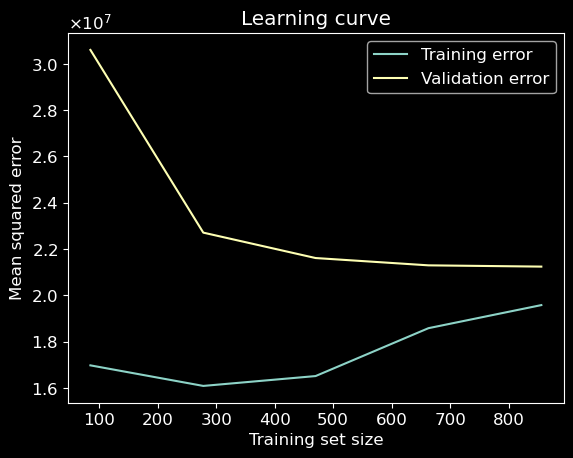

In [121]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(cb, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted Test

In [122]:
y_pred_test= cb.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [10500.05461772  6514.15998153 26962.24777866 10329.6267044
 34611.79717696  6307.0099018   3779.80726047 14238.23800433
  4884.99474756 11426.18798563 19210.74747894  8577.27628825
  5711.22773106 43289.05436976 46082.26701495 43638.91724622
 11642.41945127 43328.45299966  9875.12581609 22263.0179
  5897.04494142  8900.26293144  3602.29371568  4965.48441848
 11999.82055714 12676.18036476 14006.21260308  6450.28700625
 11144.49044177  3853.09281978  8037.8610914  12688.32605699
  4269.19427811  6050.48091372  5195.18757858  9921.9111281
  4441.03069717  8421.2769231  25137.02950986 39572.86300599
  5342.1155757   5087.84029445 12917.31619318 13369.09200549
  6938.34126662 13869.68949083  5927.81281362  5685.95492556
 41761.80209773  6515.182725   14277.50786719  4395.90340881
  8028.87149867  3854.02005129 12490.2345888  12260.76474396
  5264.93680597 38709.0179139  12835.74398568 12539.35256754
 13959.92900004  6471.57220601 15271.44821689  8753.89805102
 11992.6660022   

### Test Scores

In [123]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8798196176107408
MAE: 2491.8021425076245
MSE: 18657851.91612877
Adjusted R-squared: 0.8784539314472265


### Residual Plot

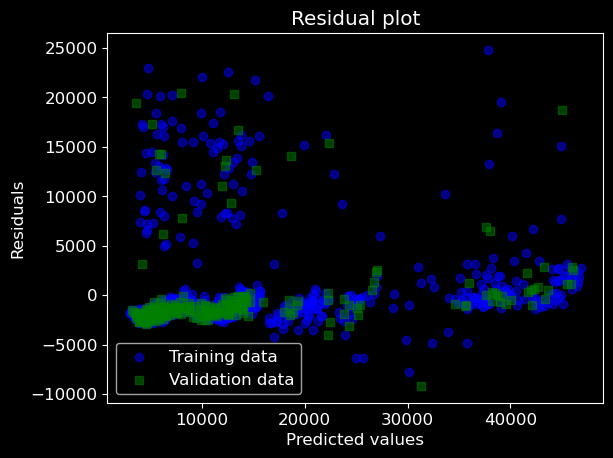

In [124]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

### KernelRidge

### GridsearchCV

In [125]:
# Create a KernelRidge model
kr = KernelRidge()

# Define the hyperparameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    kr,           # the model to tune
    param_grid,   # the hyperparameter grid
    cv=5,         # the number of folds to use for cross validation
    scoring='neg_mean_squared_error', # the scoring metric
    n_jobs=-1     # use all available processors
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters and corresponding RMSE
print("Best hyperparameters: ", grid_search.best_params_)
print("Best RMSE: ", np.sqrt(-grid_search.best_score_))

Best hyperparameters:  {'alpha': 0.1, 'kernel': 'rbf'}
Best RMSE:  4844.739191674521


In [126]:
# Build the final model using the best hyperparameters
kr = KernelRidge(**grid_search.best_params_)

In [127]:
kr.fit(X_train_transformed, y_train)

KernelRidge(alpha=0.1, kernel='rbf')

### Predicted Training

In [128]:
y_pred_train = kr.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [10097.2400976   9546.59432077 12025.12160037 ... 12690.19456115
 41235.43392704 12329.53825458]


### Training Scores

In [129]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8591232872392945
MAE: 2672.507047490281
MSE: 20333246.198788315
Adjusted R-squared: 0.8587268236949398


### Learning Curve

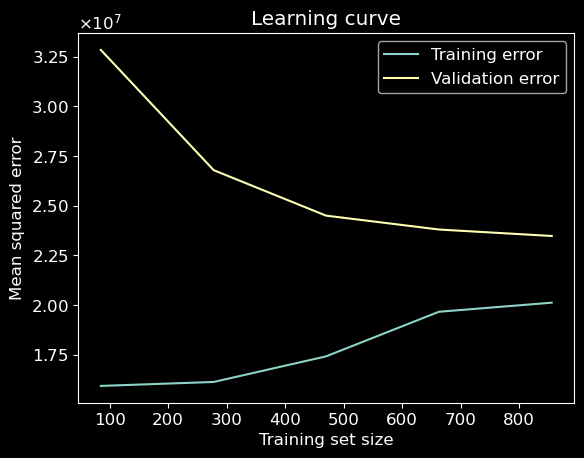

In [130]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(kr, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted Test

In [131]:
y_pred_test= kr.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [11028.91861961  5828.95967057 29173.3825485  10318.82522904
 29591.85922495  5625.74061601  4001.92359572 15382.30724416
  3793.37446467 11564.42330814 16923.86243126  8992.36093046
  5117.10258418 45434.29169019 48096.84881127 47618.3540924
 10715.30631831 46524.15377672 10012.28200519 23944.67642034
  3859.21750898  8521.44373855  2490.08241704  6694.73487845
 12436.90057364 12466.98243848 13933.23394481  7980.82033107
 11603.27322646  2310.4746538   8783.95557816 12092.75126416
  2555.53241025  7318.36546705  3703.29844206 10543.60766928
  3436.00542606  8923.49925447 22459.74521303 41648.40078218
  3542.35422108  3866.63381346 13106.26545817 13704.56557057
  7288.86969985 13269.57207841  6257.81205038  4851.84835477
 44774.04544907  6726.35461241 14778.96954943  2641.78896698
  8121.14584662  2256.01821741 13118.36398314 11816.98181392
  4722.13000778 40264.67240736 13475.27263114 12398.28022977
 15490.17916194  5194.61943179 14266.98851066  9700.33537557
 11367.99076

### Test Scores

In [132]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8580265678626738
MAE: 2757.1086885651835
MSE: 22041195.244853277
Adjusted R-squared: 0.8564132334065678


### Residual Plot

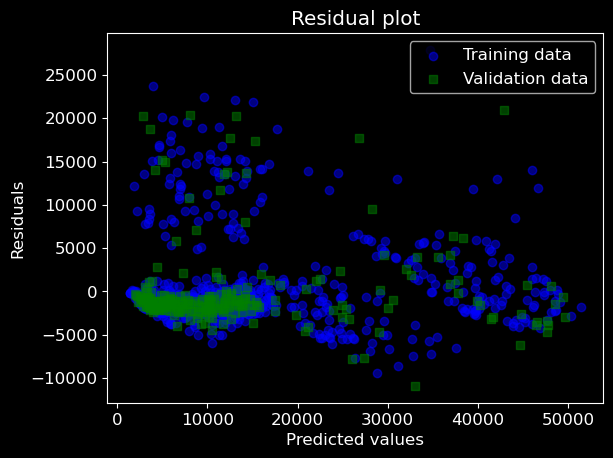

In [133]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

### XGBRegressor

### GridsearchCV

In [134]:
# Define XGBRegressor model
xgb = XGBRegressor()

# Set up hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
}

# Use GridSearchCV for hyperparameter tuning
xgb_cv = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
)

# Fit the model on the training data
xgb_cv.fit(X_train_transformed, y_train)

# Print the best hyperparameters and corresponding RMSE
print("Best hyperparameters: ", xgb_cv.best_params_)
print("Best RMSE: ", np.sqrt(-xgb_cv.best_score_))

Best hyperparameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
Best RMSE:  4587.930637829469


In [135]:
# Build the final model using the best hyperparameters
xgb = XGBRegressor(**xgb_cv.best_params_)

In [136]:
xgb.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Predicted Training

In [137]:
y_pred_train = xgb.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [ 9760.111 10430.726 12285.406 ... 12686.437 42142.84  11684.845]


### Training Scores

In [138]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8800952660165853
MAE: 2258.235929944546
MSE: 17306284.542756833
Adjusted R-squared: 0.8797578230504031


### Learning Curve

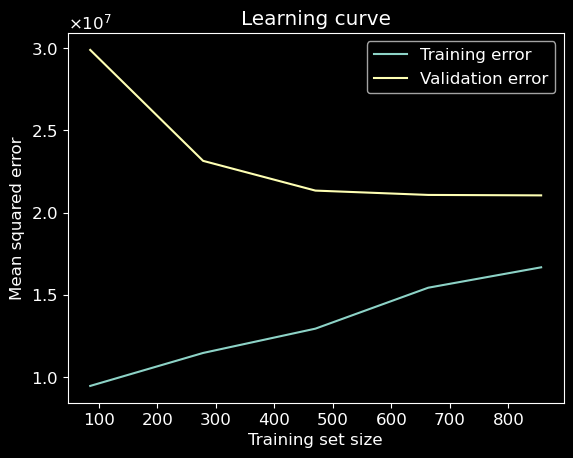

In [139]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(xgb, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted Test

In [140]:
y_pred_test= xgb.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [10993.43    6236.7803 27170.273  10097.763  34264.547   6201.8955
  3064.9888 14973.83    5302.2305 10843.926  18824.281   7960.0454
  5412.4287 44176.406  46308.055  44397.47   10976.683  43857.414
  9511.313  23299.736   6177.1265  8740.357   2512.062   4821.015
 11490.667  12791.279  14602.976   6833.536  11473.007   2783.3972
  7565.927  12520.719   3471.9373  6326.499   4831.589   9832.513
  3784.2058  8514.927  25169.797  40011.88    5287.2417  4359.9326
 13283.036  13922.13    7531.848  14616.115   6539.2603  6302.019
 42628.594   6815.3613 15210.337   3109.1582  7265.572   2728.2576
 12238.099  11931.671   4966.5635 39598.88   12122.683  12332.21
 14377.739   6459.741  16501.928   8664.431  11624.875   5645.3286
 18426.441  12079.716   5918.428   3185.9197  8296.412  11183.076
 10214.322   7487.9956  9650.564   5879.318   7280.306  12613.375
  6516.528   9476.579   3226.1738 26997.104   6361.648  38114.547
 37735.547  41880.996   6060.816  12409.361   9844.369  13

### Test Scores

In [141]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8789539784728528
MAE: 2433.533651625816
MSE: 18792241.2942155
Adjusted R-squared: 0.8775784555009535


### Residual Plot

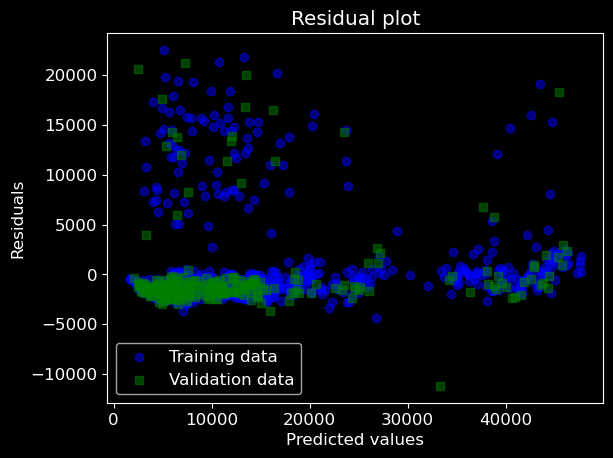

In [142]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

In [143]:
from lightgbm import LGBMRegressor

### LGBMRegressor

### GridsearchCV

In [144]:
# Define LGBMRegressor model
lgbm = LGBMRegressor()

# Set up hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 5, 7],
    'min_child_samples': [5, 10, 20]
}

# Use GridSearchCV for hyperparameter tuning
lgbm_cv = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
)

# Fit the model on the training data
lgbm_cv.fit(X_train_transformed, y_train)

# Print the best hyperparameters and corresponding RMSE
print("Best hyperparameters: ", lgbm_cv.best_params_)
print("Best RMSE: ", np.sqrt(-lgbm_cv.best_score_))

Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'min_child_samples': 20, 'n_estimators': 500, 'num_leaves': 10}
Best RMSE:  4593.093942537231


In [145]:
# Build the final model using the best hyperparameters
lgbm = LGBMRegressor(**lgbm_cv.best_params_)

In [146]:
lgbm.fit(X_train_transformed, y_train)

LGBMRegressor(learning_rate=0.01, max_depth=3, n_estimators=500, num_leaves=10)

### Predicted Training

In [147]:
y_pred_train = lgbm.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [ 9108.91266101 11025.98078085 11844.12823847 ... 12244.86469322
 43006.69526613 12132.81271701]


### Training Scores

In [148]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8772108735210977
MAE: 2334.27786114379
MSE: 17722599.358707346
Adjusted R-squared: 0.8768653131276298


### Learning Curve

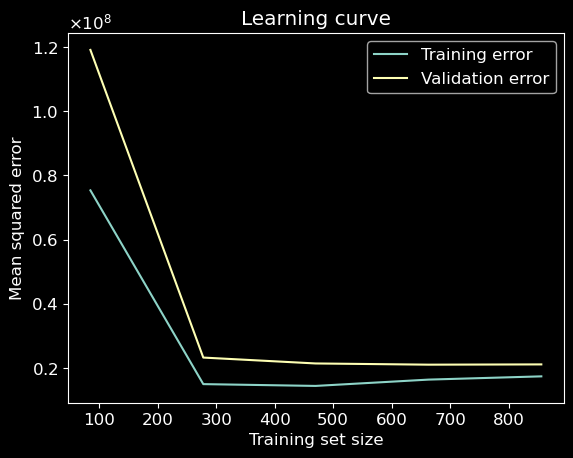

In [149]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(lgbm, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted Test

In [150]:
y_pred_test= lgbm.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [10573.57386149  6218.55715674 26913.19186989  9916.38890728
 34163.06886544  5755.02034372  3148.77936392 14694.21744687
  5354.26727362 11262.3216679  18097.44307133  8043.84007911
  5654.32042921 45378.23009166 47063.76054912 45378.23009166
 11069.72659977 44277.49379793  9582.05810531 24052.22370437
  6463.17869307  9262.69135898  2742.83242955  4829.62223074
 11419.47048391 12548.34748194 14664.42061806  7225.84079056
 11684.11132608  3182.92337137  8382.81666725 12362.95879462
  3265.27756469  6562.23878213  4833.55652338 10495.09119872
  3885.51291567  9271.66587396 24353.49621125 40555.62008092
  5652.10014294  4423.87884467 13155.6881234  14416.21840481
  7589.00623352 15433.50151705  6274.92838333  6182.63614566
 42562.97291952  6729.0337211  14744.15326243  4232.63565262
  7557.6504654   3067.93013723 12218.88360438 11591.7973531
  5128.49084446 39913.59991548 12788.57939128 12493.66944545
 14522.18126482  6120.94344079 16920.60104518  8143.05441349
 11901.80699

### Test Scores

In [151]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8799139278248302
MAE: 2465.447374448279
MSE: 18643210.37502467
Adjusted R-squared: 0.8785493133682942


### Residual Plot

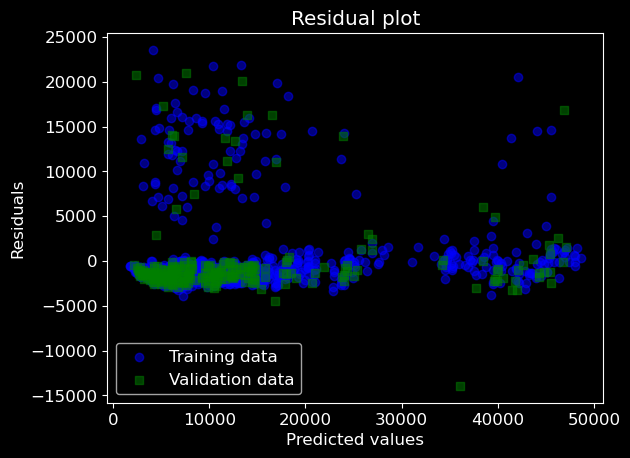

In [152]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

### RandomForestRegressor

### GridsearchCV

In [153]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit the grid search object to the training data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters and corresponding RMSE
print("Best hyperparameters: ", grid_search.best_params_)
print("Best RMSE: ", np.sqrt(-grid_search.best_score_))

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE:  4648.3032669432205


In [154]:
# Build the final model using the best hyperparameters
rf = RandomForestRegressor(**grid_search.best_params_)

In [155]:
rf.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

### Predicted Training

In [156]:
y_pred_train = rf.predict(X_train_transformed)
print("Predicted y:", y_pred_train)

Predicted y: [ 9827.01831423 11213.48080136 12413.32913671 ... 12584.30436594
 44924.34735576 12195.55777942]


### Training Scores

In [157]:
# Scores for training model
R2= r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
adj_r2 = 1 - ((1 - R2) * (len(y_train) - 1)) / (len(y_train) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.882363290199101
MAE: 2284.9674555695983
MSE: 16978932.397862386
Adjusted R-squared: 0.8820322300401866


### Learning Curve

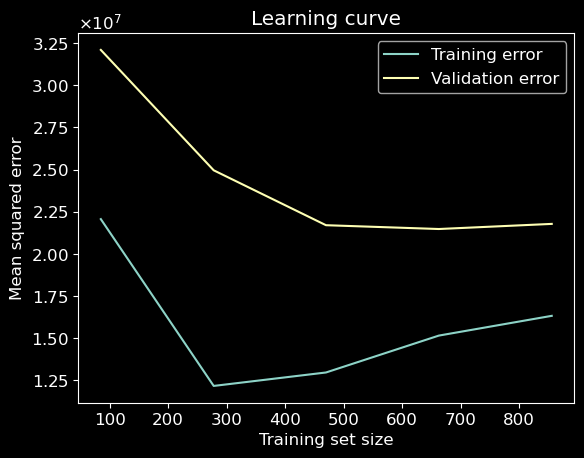

In [158]:
# create learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve')

# set y-axis formatter to display numbers in regular notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.legend()
plt.show()

### Predicted test

In [159]:
y_pred_test= rf.predict(X_test_transformed)
print("Predicted y:", y_pred_test)

Predicted y: [10602.51286558  5791.59258225 27135.28241596 10200.39408902
 34811.71563557  6541.19690815  2519.4832732  14072.22923457
  5918.56788102 11302.35763483 19391.03106765  7217.23304416
  5445.20842973 45766.0367652  47459.70442107 45396.75042398
 10663.40120213 44555.08195012 10205.19860959 24030.96625774
  5792.75527427  9171.24588787  2610.28029116  3539.26450584
 11795.11796055 12651.61923619 13824.79312135  6596.68737936
 11483.6293011   2692.06227984  7115.46490522 12554.74795761
  3051.32542757  6904.44197748  4850.93873033 10368.54384191
  3646.86215949  9054.09532822 24290.74123976 40995.93651186
  5483.13898058  4725.87619832 12909.00842625 14574.08555391
  6632.09699644 15443.24152888  7137.04363361  5663.57770061
 43283.2049326   5993.71494216 14049.61302489  3755.33355499
  7166.92739724  2660.71683525 12385.00548235 11396.63936775
  4940.88501625 40319.13849273 12421.58458379 12505.06322081
 13934.2824073   5947.6881811  18804.01749665  7368.88138103
 11930.4817

In [160]:
# Scores for test model
R2= r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
adj_r2 = 1 - ((1 - R2) * (len(y_test) - 1)) / (len(y_test) - 1 - len(num_cols))

print("R2:", R2)
print("MAE:", mae)
print("MSE:", mse)
print("Adjusted R-squared:", adj_r2)

R2: 0.8780374245198135
MAE: 2486.1337625890114
MSE: 18934535.13276864
Adjusted R-squared: 0.8766514861620841


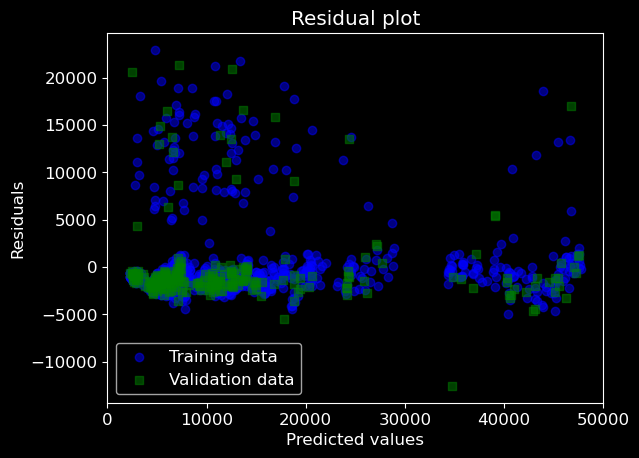

In [161]:
# calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot residuals
plt.scatter(y_pred_train, residuals_train, c='blue', marker='o', alpha=0.5, label='Training data')
plt.scatter(y_pred_test, residuals_test, c='green', marker='s', alpha=0.5, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

In [166]:
# create the dataframe
results = pd.DataFrame({
    'Linear Regression': [0.781114772, 4213.798595, 33981653.95, 0.77862744],
    'Lasso': [0.781114772, 4213.798595, 33981653.95, 0.77862744],
    'Ridge': [0.781114772, 4213.798595, 33981653.95, 0.77862744],
    'GradientBoostingRegressor': [0.87967592, 2429.617141, 18680160.75, 0.878308601],
    'ElasticNet': [0.783095112, 4197.03468, 33674208.73, 0.780630284],
    'CatBoostRegressor': [0.879819618, 2491.802143, 18657851.92, 0.878453931],
    'KernelRidge': [0.858026568, 2757.108689, 22041195.24, 0.856413233],
    'XGBRegressor': [0.878953978, 2433.533652, 18792241.29, 0.877578456],
    'LGBMRegressor': [0.879913928, 2465.447374, 18643210.38, 0.878549313],
    'RandomForestRegressor': [0.878037425, 2486.133763, 18934535.13, 0.876651486]
}, index=['R2', 'MAE', 'MSE', 'Adjusted R-squared']).T


In [167]:
# sort the results by R2 and Adjusted R2 in descending order, and by MAE and MSE in ascending order
results_df = results.sort_values(by=['R2', 'Adjusted R-squared', 'MAE', 'MSE'], ascending=[False, False, True, True])

results_df

,R2,MAE,MSE,Adjusted R-squared
LGBMRegressor,0.879914,2465.447374,18643210.38,0.878549
CatBoostRegressor,0.879820,2491.802143,18657851.92,0.878454
GradientBoostingRegressor,0.879676,2429.617141,18680160.75,0.878309
XGBRegressor,0.878954,2433.533652,18792241.29,0.877578
RandomForestRegressor,0.878037,2486.133763,18934535.13,0.876651
KernelRidge,0.858027,2757.108689,22041195.24,0.856413
ElasticNet,0.783095,4197.034680,33674208.73,0.780630
Linear Regression,0.781115,4213.798595,33981653.95,0.778627
Lasso,0.781115,4213.798595,33981653.95,0.778627
Ridge,0.781115,4213.798595,33981653.95,0.778627


### Saved trained file

In [164]:
import joblib

In [168]:
# Save the model using joblib
joblib.dump(gbm, 'LGBMRegressor-joblib.pkl')

['LGBMRegressor-joblib.pkl']